<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1801-1850.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

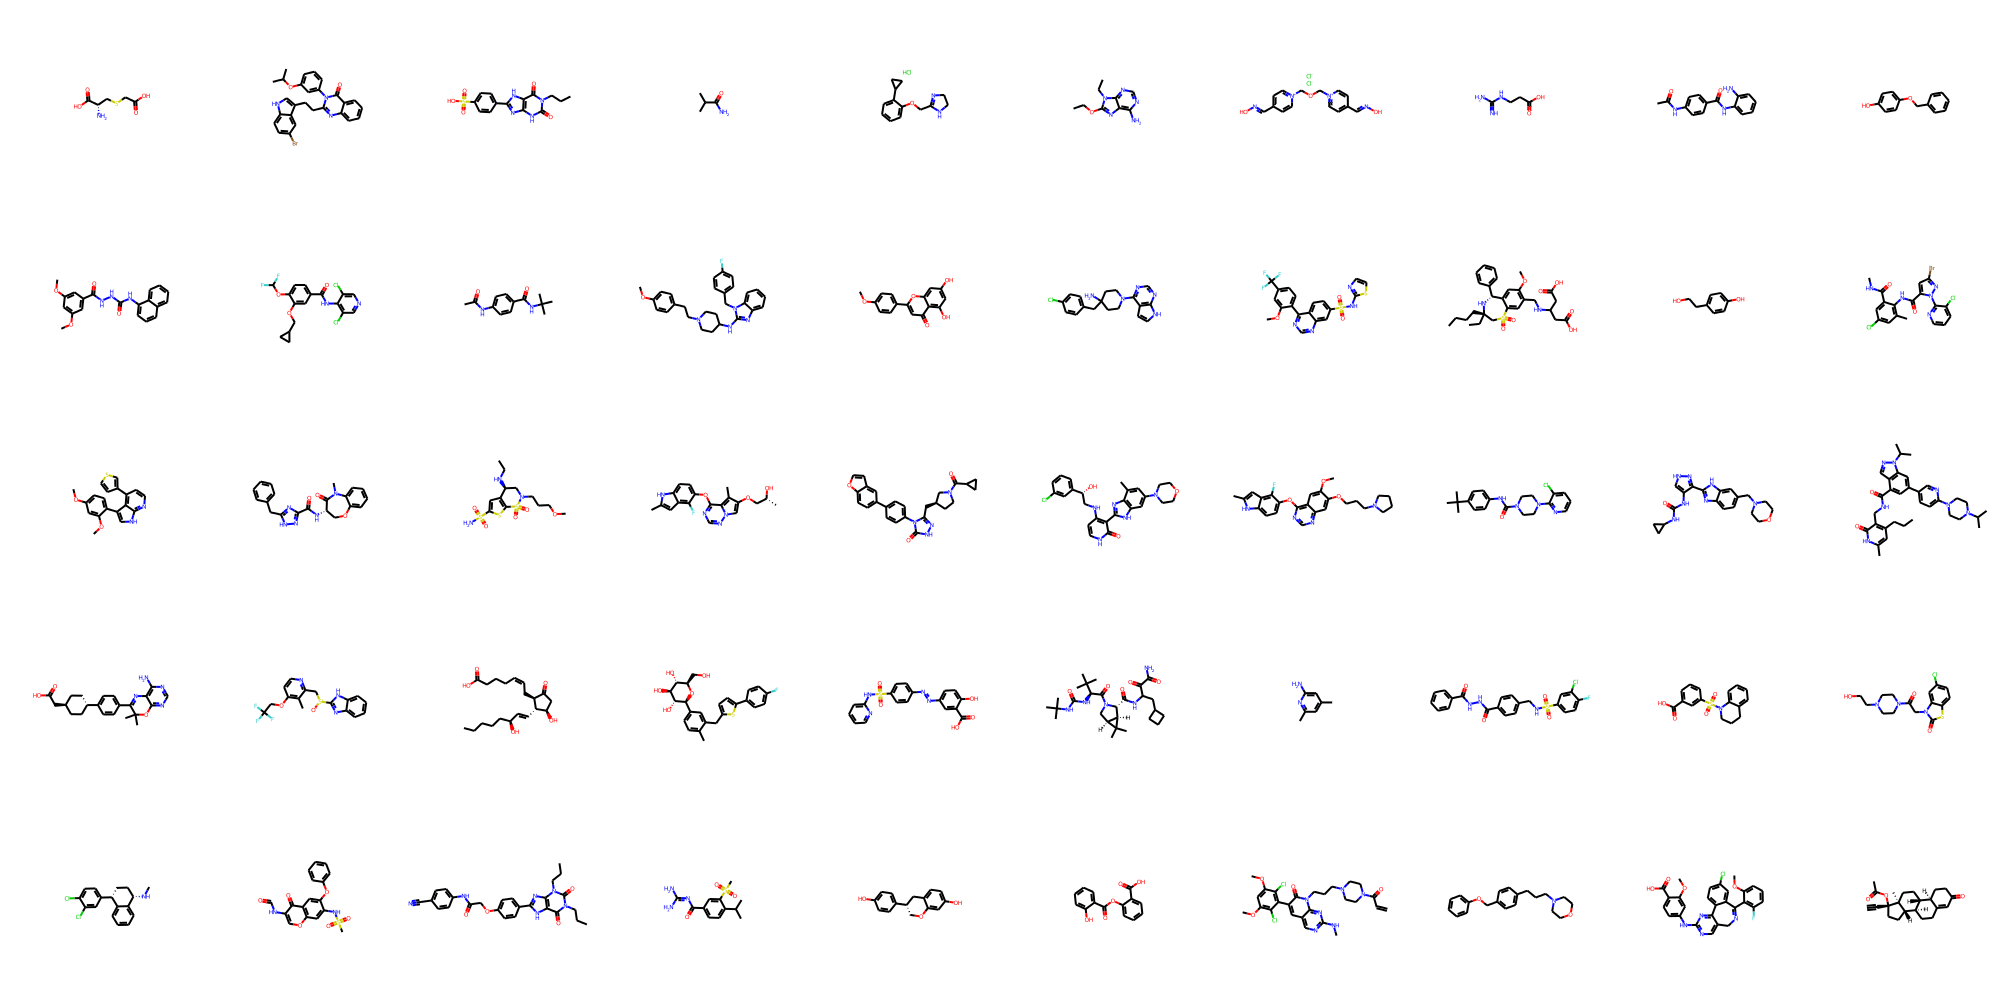

In [3]:
smiles_list = [

'N[C@@H](CSCC(=O)O)C(=O)O',
'CC(C)Oc1cccc(-n2c(CCc3c[nH]c4ccc(Br)cc34)nc3ccccc3c2=O)c1',
'CCCn1c(=O)[nH]c2nc(-c3ccc(S(=O)(=O)O)cc3)[nH]c2c1=O',
'CC(C)C(N)=O',
'Cl.c1ccc(C2CC2)c(OCC2=NCCN2)c1',
'CCOc1nc2c(N)ncnc2n1CC',
'O/N=C/c1cc[n+](COC[n+]2ccc(/C=N/O)cc2)cc1.[Cl-].[Cl-]',
'N=C(N)NCCC(=O)O',
'CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1',
'Oc1ccc(OCc2ccccc2)cc1',
'COc1cc(OC)cc(C(=O)NNC(=O)Nc2cccc3ccccc23)c1',
'O=C(Nc1c(Cl)cncc1Cl)c1ccc(OC(F)F)c(OCC2CC2)c1',
'CC(=O)Nc1ccc(C(=O)NC(C)(C)C)cc1',
'COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1',
'COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1',
'NC1(Cc2ccc(Cl)cc2)CCN(c2ncnc3[nH]ccc23)CC1',
'COc1cc(C(F)(F)F)ccc1-c1ncnc2cc(S(=O)(=O)Nc3nccs3)ccc12',
'CCCC[C@]1(CC)CS(=O)(=O)c2cc(CNC(CC(=O)O)CC(=O)O)c(OC)cc2[C@@H](c2ccccc2)N1',
'OCCc1ccc(O)cc1',
'CNC(=O)c1cc(Cl)cc(C)c1NC(=O)c1cc(Br)nn1-c1ncccc1Cl',
'COc1ccc(-c2c[nH]c3nccc(-c4ccsc4)c23)c(OC)c1',
'CN1C(=O)[C@@H](NC(=O)c2n[nH]c(Cc3ccccc3)n2)COc2ccccc21',
'CCN[C@H]1CN(CCCOC)S(=O)(=O)c2sc(S(N)(=O)=O)cc21',
'Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)O)c(C)c34)ccc2[nH]1',
'O=C(C1CC1)N1CC[C@@H](Cc2n[nH]c(=O)n2-c2ccc(-c3ccc4occc4c3)cc2)C1',
'Cc1cc(N2CCOCC2)cc2[nH]c(-c3c(NC[C@@H](O)c4cccc(Cl)c4)cc[nH]c3=O)nc12',
'COc1cc2c(Oc3ccc4[nH]c(C)cc4c3F)ncnc2cc1OCCCN1CCCC1',
'CC(C)(C)c1ccc(NC(=O)N2CCN(c3ncccc3Cl)CC2)cc1',
'O=C(Nc1c[nH]nc1-c1nc2ccc(CN3CCOCC3)cc2[nH]1)NC1CC1',
'CCCc1cc(C)[nH]c(=O)c1CNC(=O)c1cc(-c2ccc(N3CCN(C(C)C)CC3)nc2)cc2c1cnn2C(C)C',
'CC1(C)Oc2ncnc(N)c2N=C1c1ccc([C@H]2CC[C@H](CC(=O)O)CC2)cc1',
'Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1',
'CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)CC(=O)[C@@H]1C/C=C\CCCC(=O)O',
'Cc1ccc([C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)cc1Cc1ccc(-c2ccc(F)cc2)s1',
'O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O',
'CC(C)(C)NC(=O)N[C@H](C(=O)N1C[C@H]2[C@@H]([C@H]1C(=O)NC(CC1CCC1)C(=O)C(N)=O)C2(C)C)C(C)(C)C',
'Cc1cc(C)nc(N)c1',
'O=C(NNC(=O)c1ccc(CNS(=O)(=O)c2ccc(F)c(Cl)c2)cc1)c1ccccc1',
'O=C(O)c1cccc(S(=O)(=O)N2CCCc3ccccc32)c1',
'O=C(Cn1c(=O)sc2ccc(Cl)cc21)N1CCN(CCO)CC1',
'CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21',
'CS(=O)(=O)Nc1cc2occ(NC=O)c(=O)c2cc1Oc1ccccc1',
'CCCn1c(=O)c2[nH]c(-c3ccc(OCC(=O)Nc4ccc(C#N)cc4)cc3)nc2n(CCC)c1=O',
'CC(C)c1ccc(C(=O)N=C(N)N)cc1S(C)(=O)=O',
'Oc1ccc([C@H]2COc3cc(O)ccc3C2)cc1',
'O=C(Oc1ccccc1C(=O)O)c1ccccc1O',
'C=CC(=O)N1CCN(CCCn2c(=O)c(-c3c(Cl)c(OC)cc(OC)c3Cl)cc3cnc(NC)nc32)CC1',
'c1ccc(OCc2ccc(CCCN3CCOCC3)cc2)cc1',
'COc1cc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)cccc2OC)=NC3)ccc1C(=O)O',
'C#C[C@]1(OC(C)=O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@@]21C',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



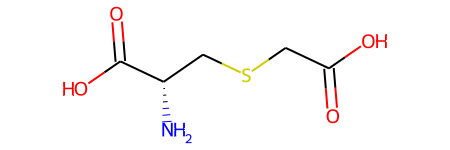

In [4]:
M1 = mol_list [0]
M1

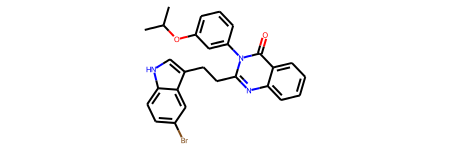

In [5]:
M2 = mol_list [1]
M2

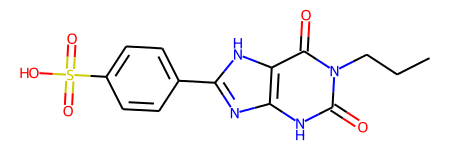

In [6]:
M3 = mol_list [2]
M3

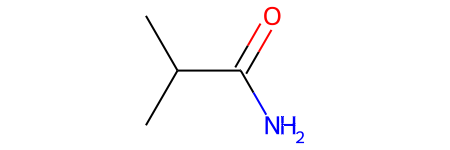

In [7]:
M4 = mol_list [3]
M4

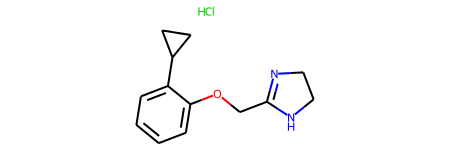

In [8]:
M5 = mol_list [4]
M5

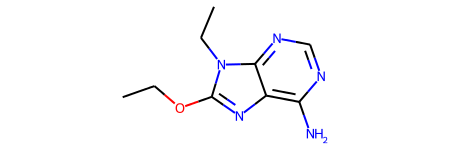

In [9]:
M6 = mol_list [5]
M6

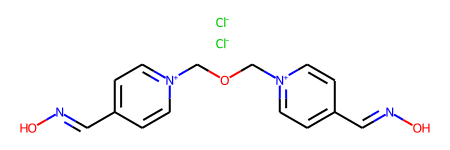

In [10]:
M7 = mol_list [6]
M7

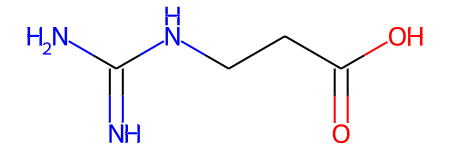

In [11]:
M8 = mol_list [7]
M8

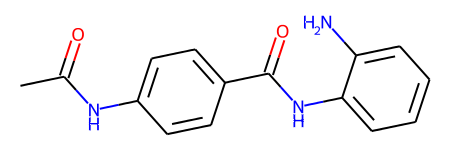

In [12]:
M9 = mol_list [8]
M9

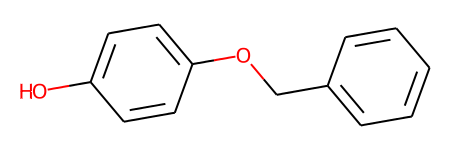

In [13]:
M10 = mol_list [9]
M10

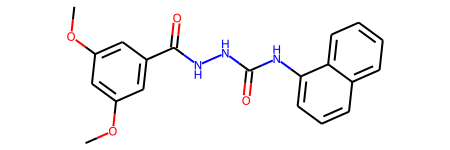

In [14]:
M11 = mol_list [10]
M11

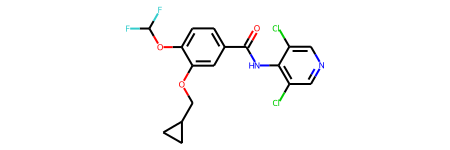

In [15]:
M12 = mol_list [11]
M12

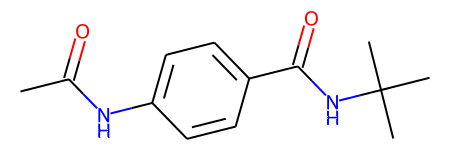

In [16]:
M13 = mol_list [12]
M13

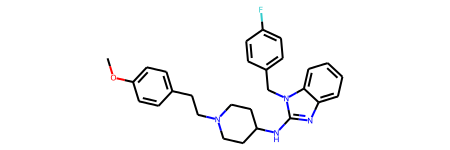

In [17]:
M14 = mol_list [13]
M14

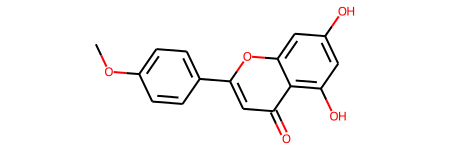

In [18]:
M15 = mol_list [14]
M15

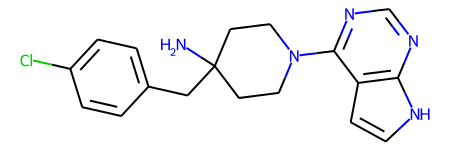

In [19]:
M16 = mol_list [15]
M16

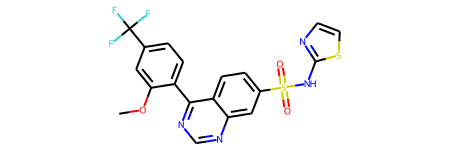

In [20]:
M17 = mol_list [16]
M17

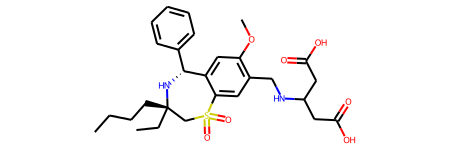

In [21]:
M18 = mol_list [17]
M18

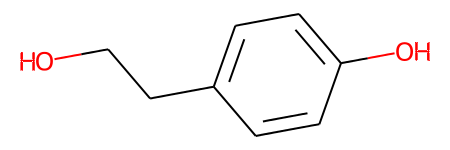

In [22]:
M19 = mol_list [18]
M19

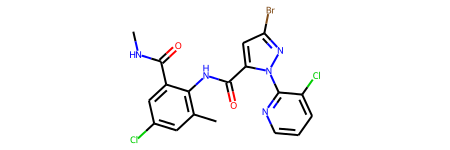

In [23]:
M20 = mol_list [19]
M20

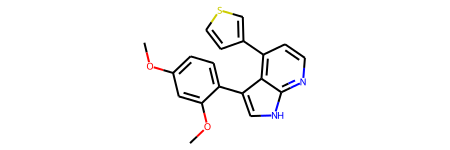

In [24]:
M21 = mol_list [20]
M21

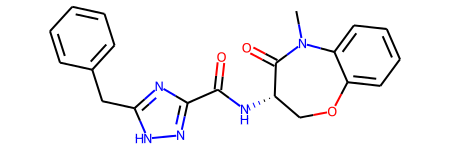

In [25]:
M22 = mol_list [21]
M22

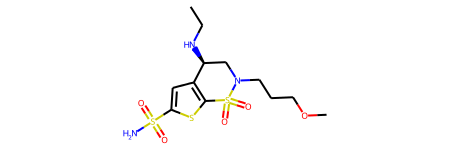

In [26]:
M23 = mol_list [22]
M23

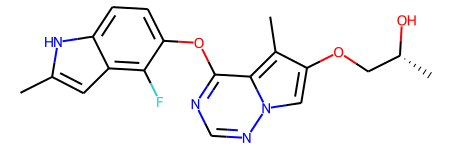

In [27]:
M24 = mol_list [23]
M24

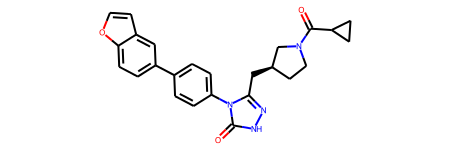

In [28]:
M25 = mol_list [24]
M25

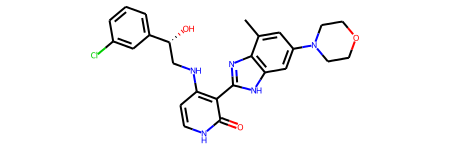

In [29]:
M26 = mol_list [25]
M26

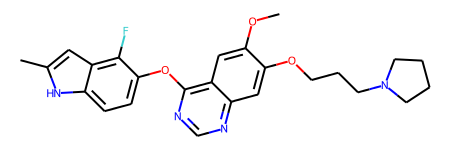

In [30]:
M27 = mol_list [26]
M27

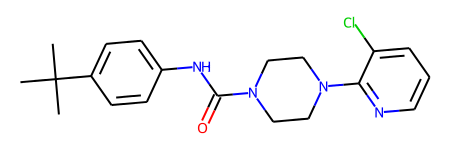

In [31]:
M28 = mol_list [27]
M28

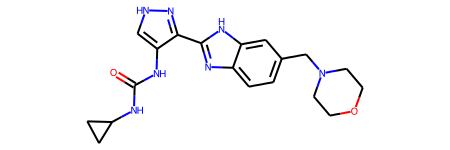

In [32]:
M29 = mol_list [28]
M29

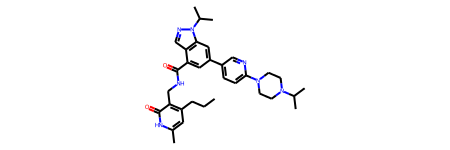

In [33]:
M30 = mol_list [29]
M30

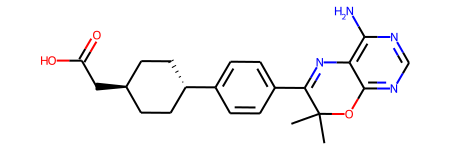

In [34]:
M31 = mol_list [30]
M31

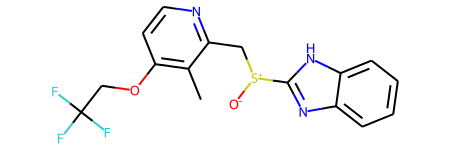

In [35]:
M32 = mol_list [31]
M32

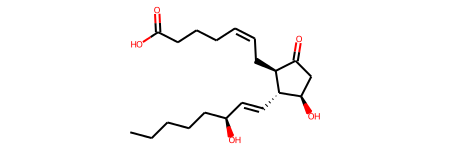

In [36]:
M33 = mol_list [32]
M33

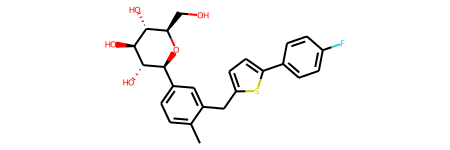

In [37]:
M34 = mol_list [33]
M34

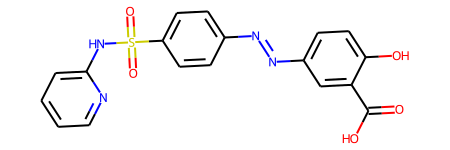

In [38]:
M35 = mol_list [34]
M35

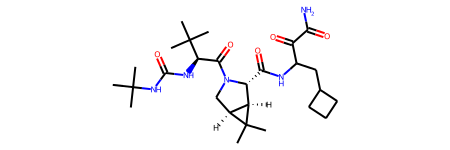

In [39]:
M36 = mol_list [35]
M36

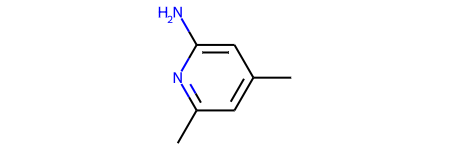

In [40]:
M37= mol_list [36]
M37

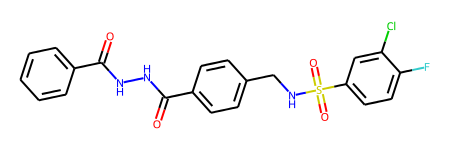

In [41]:
M38= mol_list [37]
M38

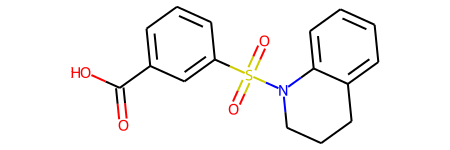

In [42]:
M39= mol_list [38]
M39

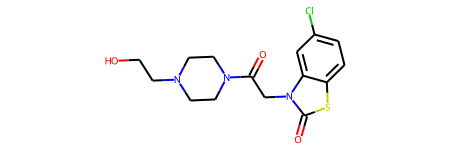

In [43]:
M40= mol_list [39]
M40

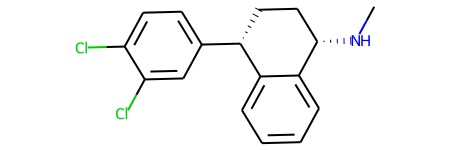

In [44]:
M41= mol_list [40]
M41

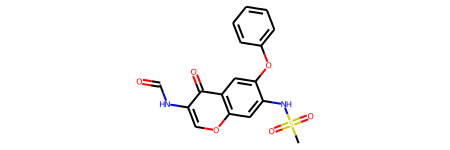

In [45]:
M42= mol_list [41]
M42

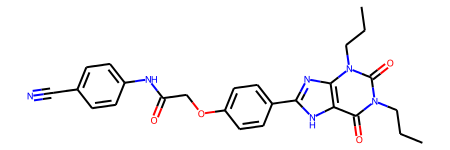

In [46]:
M43= mol_list [42]
M43

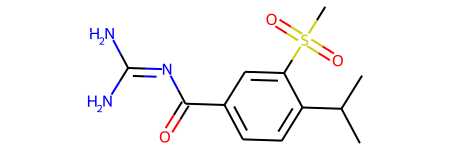

In [47]:
M44= mol_list [43]
M44

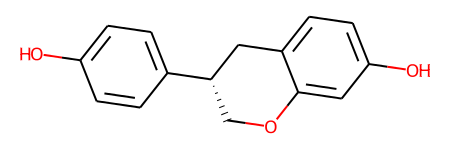

In [48]:
M45= mol_list [44]
M45

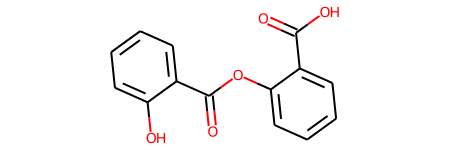

In [49]:
M46= mol_list [45]
M46

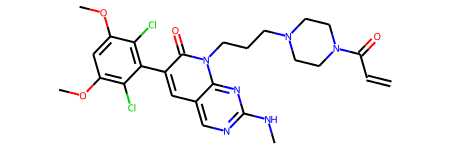

In [50]:
M47= mol_list [46]
M47

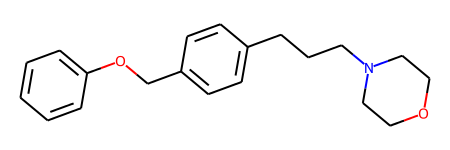

In [51]:
M48= mol_list [47]
M48

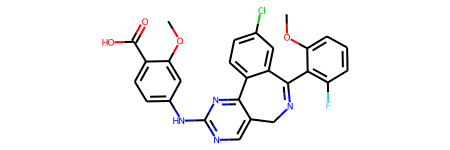

In [52]:
M49= mol_list [48]
M49

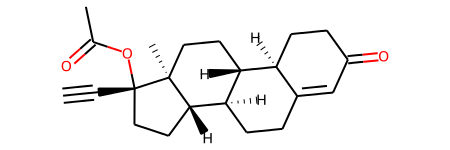

In [53]:
M50= mol_list [49]
M50

In [54]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 69,
 80,
 116,
 147,
 323,
 389,
 396,
 403,
 471,
 650,
 713,
 786,
 807,
 820,
 825,
 883,
 893,
 935,
 953]

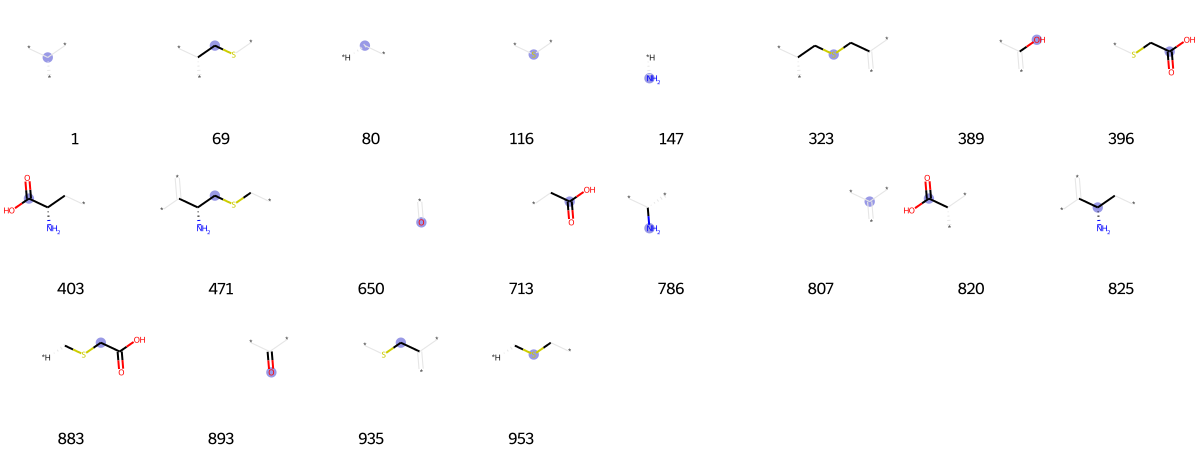

In [55]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [56]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 15,
 25,
 33,
 62,
 64,
 73,
 80,
 90,
 107,
 119,
 133,
 175,
 219,
 243,
 283,
 289,
 314,
 318,
 322,
 325,
 328,
 333,
 356,
 364,
 378,
 389,
 421,
 476,
 504,
 515,
 549,
 555,
 562,
 578,
 607,
 650,
 664,
 695,
 706,
 726,
 728,
 766,
 801,
 806,
 831,
 849,
 855,
 869,
 875,
 893,
 909,
 913,
 915,
 935,
 954,
 969,
 983,
 1000]

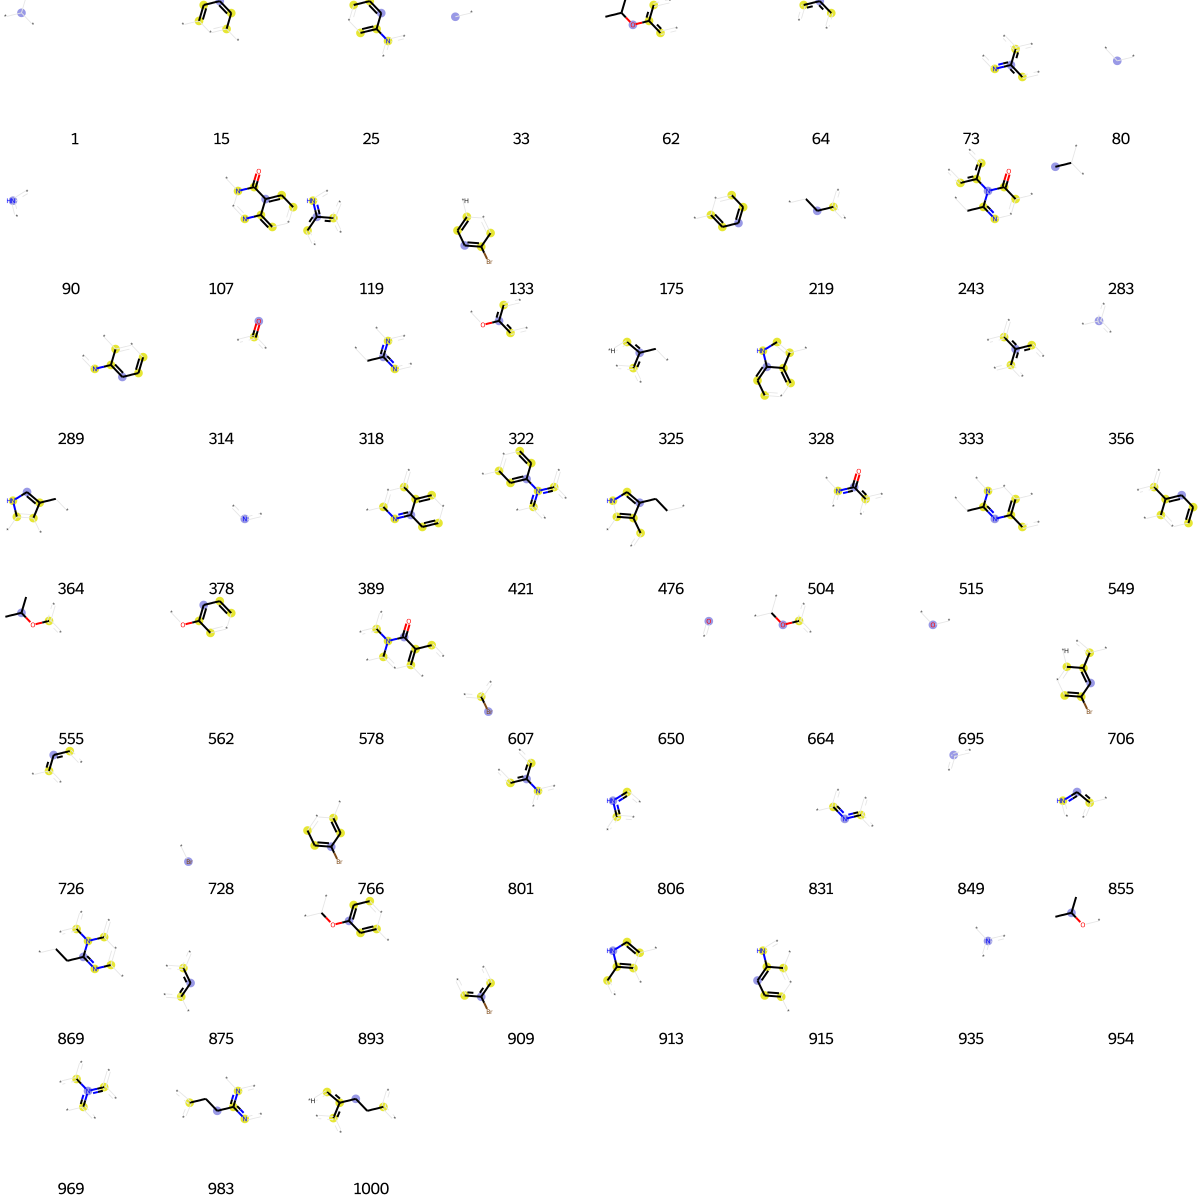

In [57]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [58]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 42,
 51,
 80,
 90,
 121,
 128,
 136,
 153,
 159,
 294,
 314,
 319,
 350,
 356,
 367,
 378,
 430,
 452,
 455,
 456,
 504,
 506,
 525,
 585,
 592,
 626,
 650,
 674,
 687,
 715,
 721,
 726,
 727,
 758,
 794,
 802,
 807,
 820,
 831,
 849,
 885,
 896,
 935]

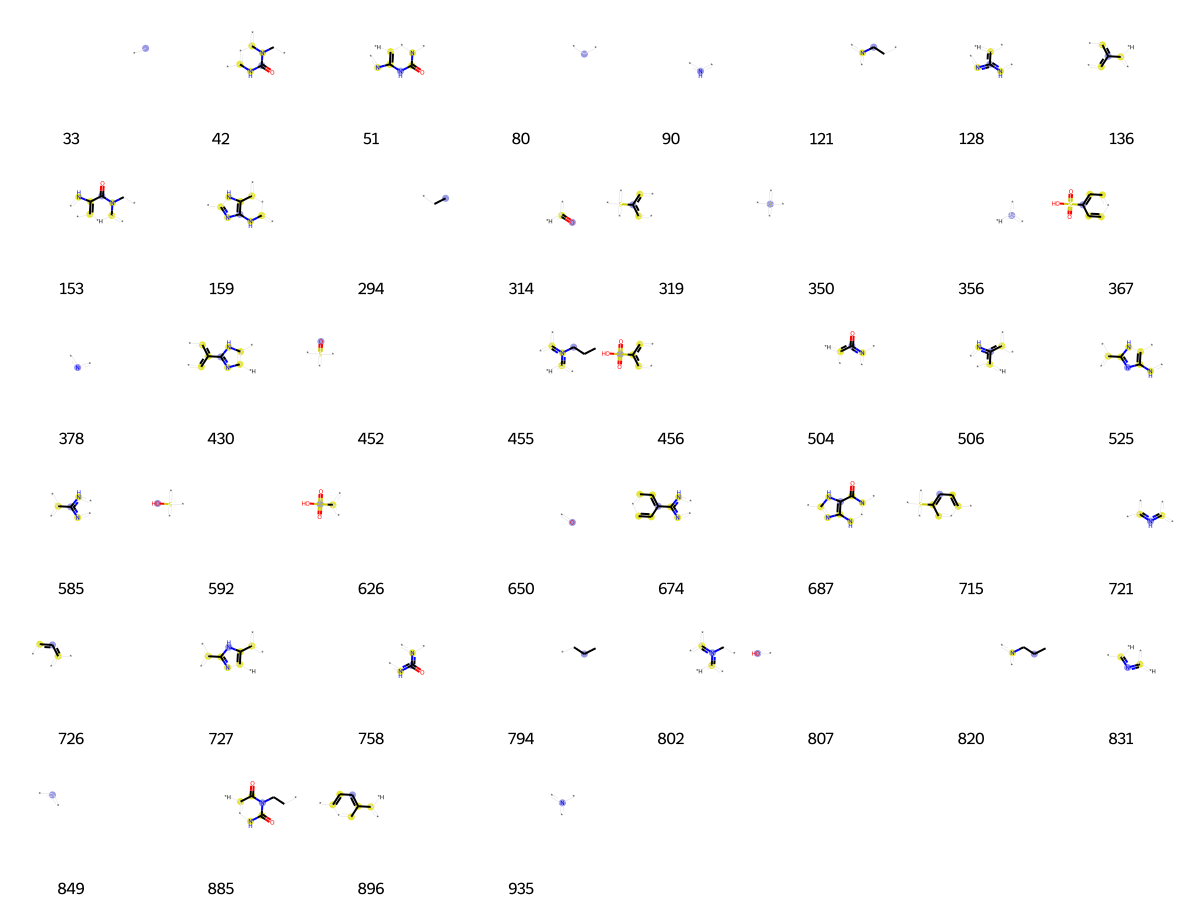

In [59]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [60]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1, 33, 140, 147, 188, 283, 325, 650, 679, 807, 893]

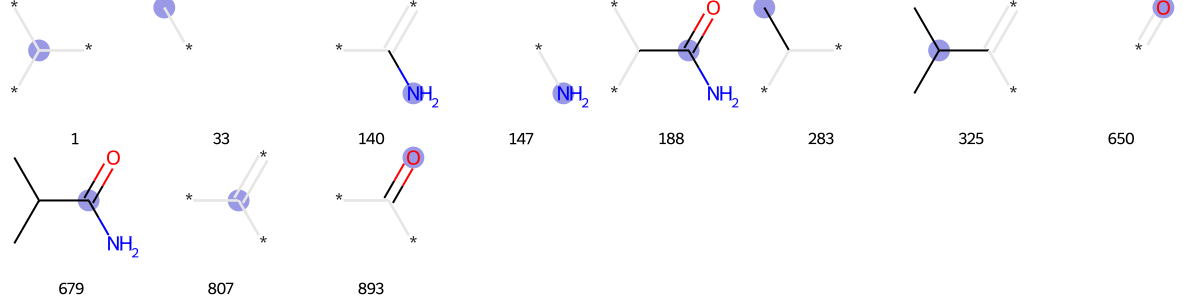

In [61]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [62]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[3,
 49,
 64,
 80,
 89,
 90,
 175,
 202,
 297,
 301,
 305,
 313,
 356,
 371,
 378,
 380,
 386,
 424,
 428,
 501,
 514,
 643,
 695,
 696,
 726,
 745,
 785,
 836,
 842,
 849,
 872,
 881,
 926,
 946,
 976,
 1019]

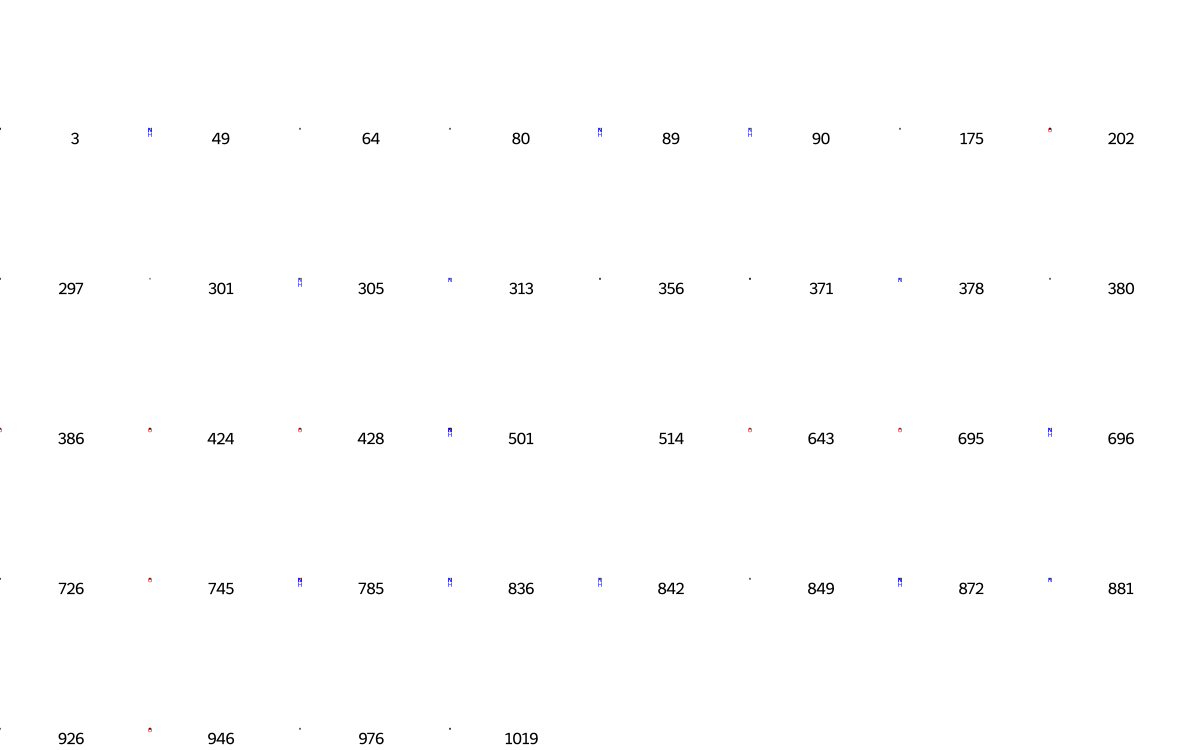

In [63]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [64]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 34,
 78,
 80,
 147,
 209,
 214,
 233,
 237,
 238,
 294,
 356,
 378,
 428,
 433,
 435,
 489,
 499,
 548,
 662,
 672,
 695,
 700,
 786,
 802,
 814,
 831,
 849,
 850,
 935,
 962,
 984]

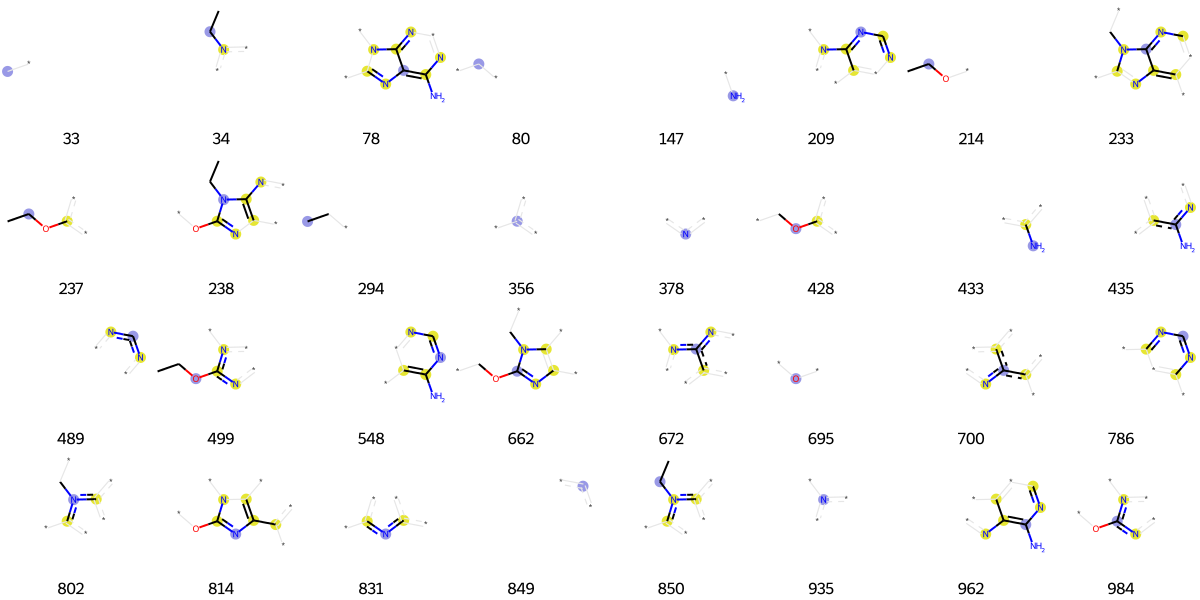

In [65]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [66]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[40,
 80,
 145,
 157,
 270,
 343,
 356,
 387,
 463,
 652,
 694,
 695,
 725,
 726,
 750,
 807,
 813,
 842,
 845,
 849,
 864,
 876,
 891,
 968,
 1003,
 1009]

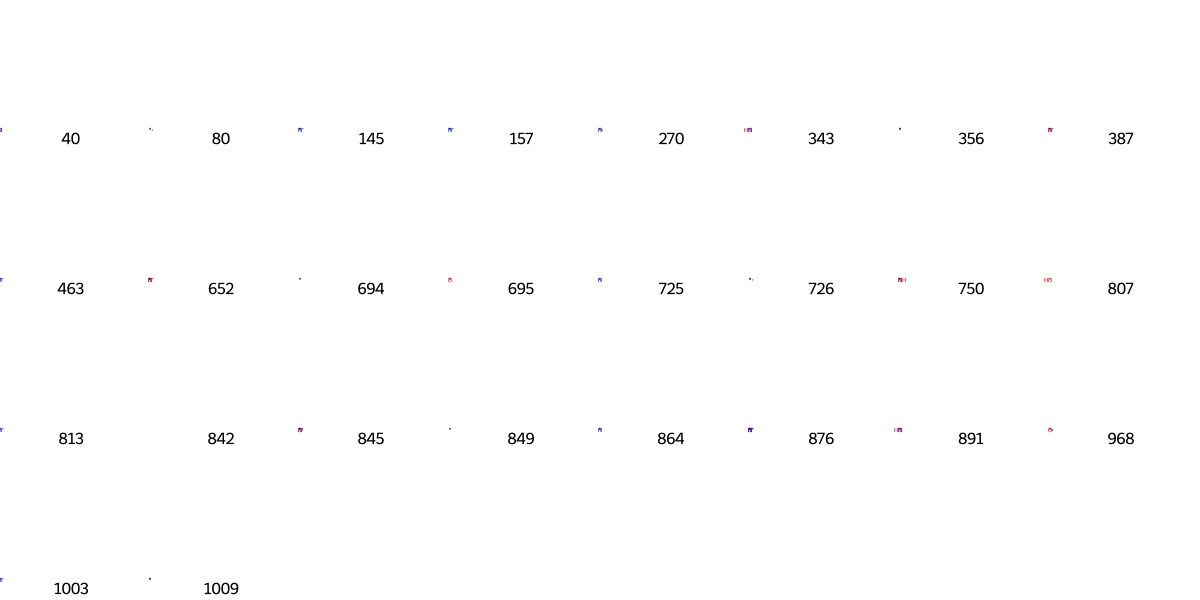

In [67]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [68]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[80,
 128,
 140,
 147,
 197,
 201,
 263,
 363,
 389,
 427,
 540,
 623,
 650,
 667,
 713,
 807,
 893,
 894,
 983]

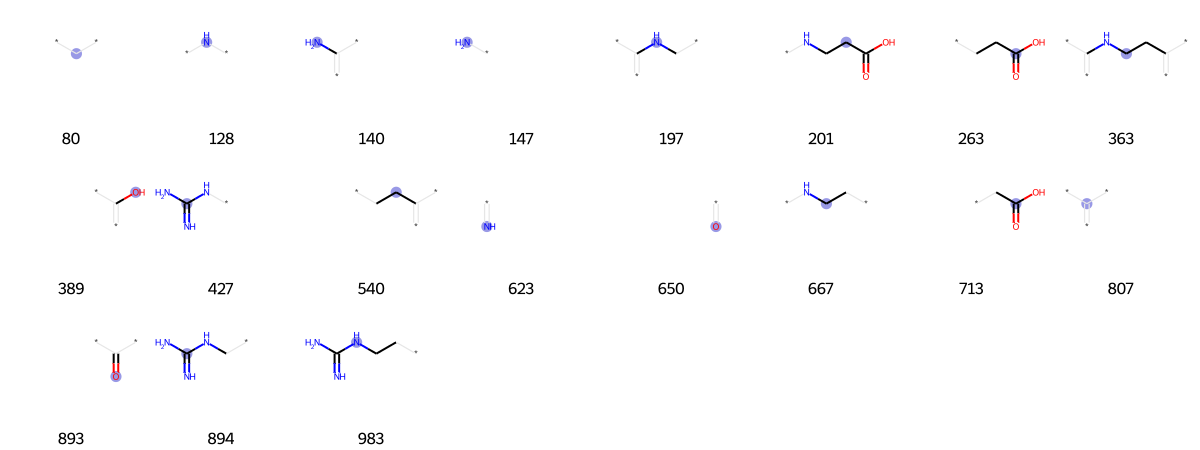

In [69]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [70]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 53,
 64,
 128,
 147,
 175,
 191,
 200,
 245,
 356,
 361,
 433,
 486,
 494,
 530,
 641,
 650,
 672,
 673,
 726,
 771,
 792,
 807,
 816,
 843,
 849,
 893,
 910,
 947,
 999,
 1017]

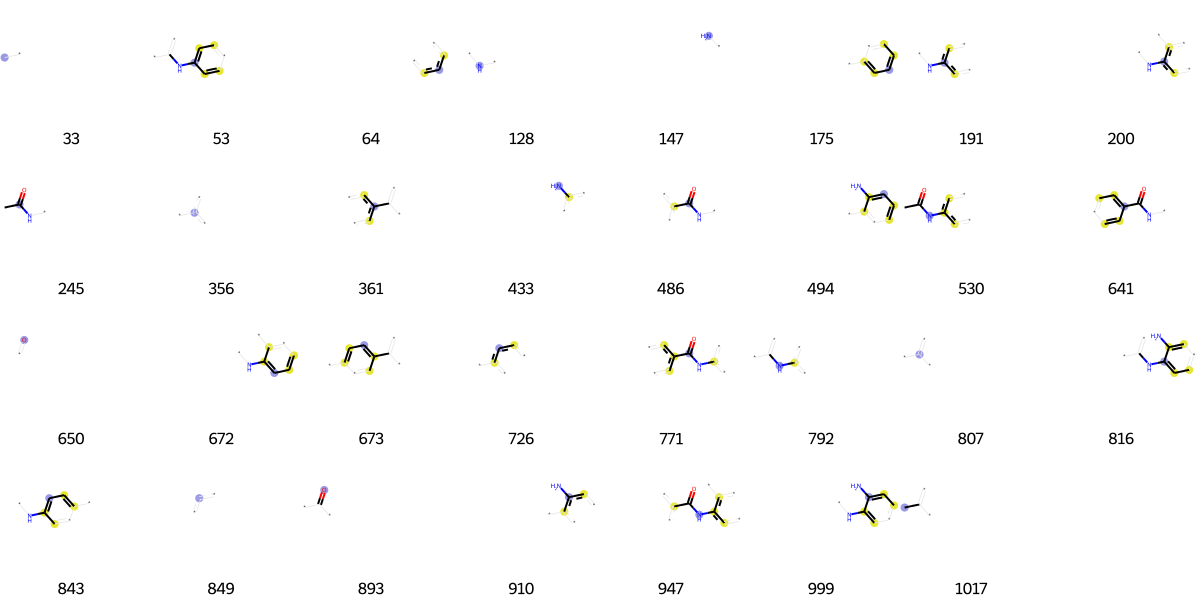

In [71]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [72]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[42,
 64,
 80,
 102,
 107,
 175,
 289,
 322,
 356,
 389,
 428,
 578,
 654,
 695,
 718,
 726,
 730,
 745,
 754,
 807,
 849,
 1018]

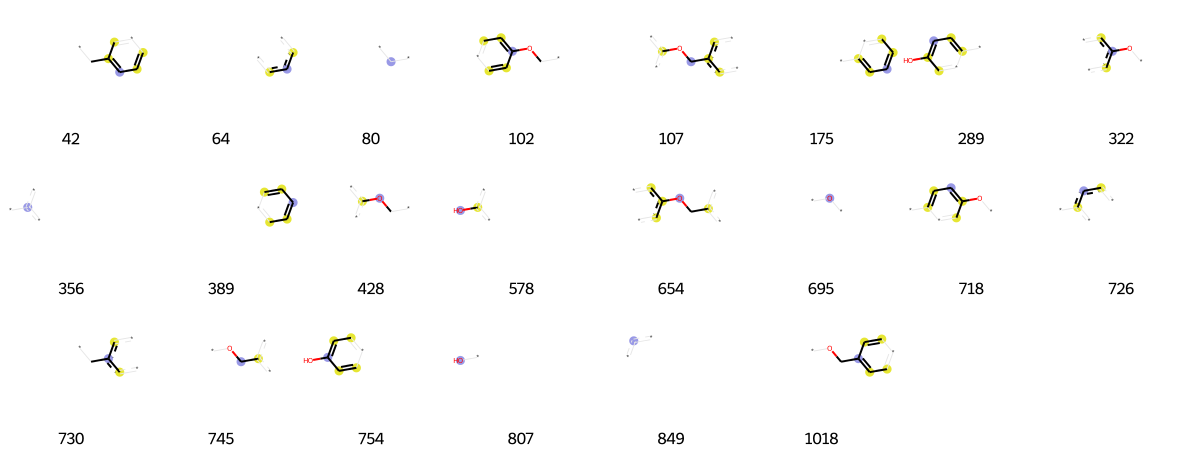

In [73]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [74]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[7,
 15,
 33,
 63,
 64,
 80,
 128,
 175,
 194,
 200,
 304,
 322,
 333,
 356,
 360,
 361,
 363,
 420,
 486,
 512,
 539,
 540,
 549,
 573,
 650,
 672,
 695,
 726,
 728,
 745,
 781,
 792,
 807,
 831,
 841,
 849,
 875,
 893,
 942,
 965]

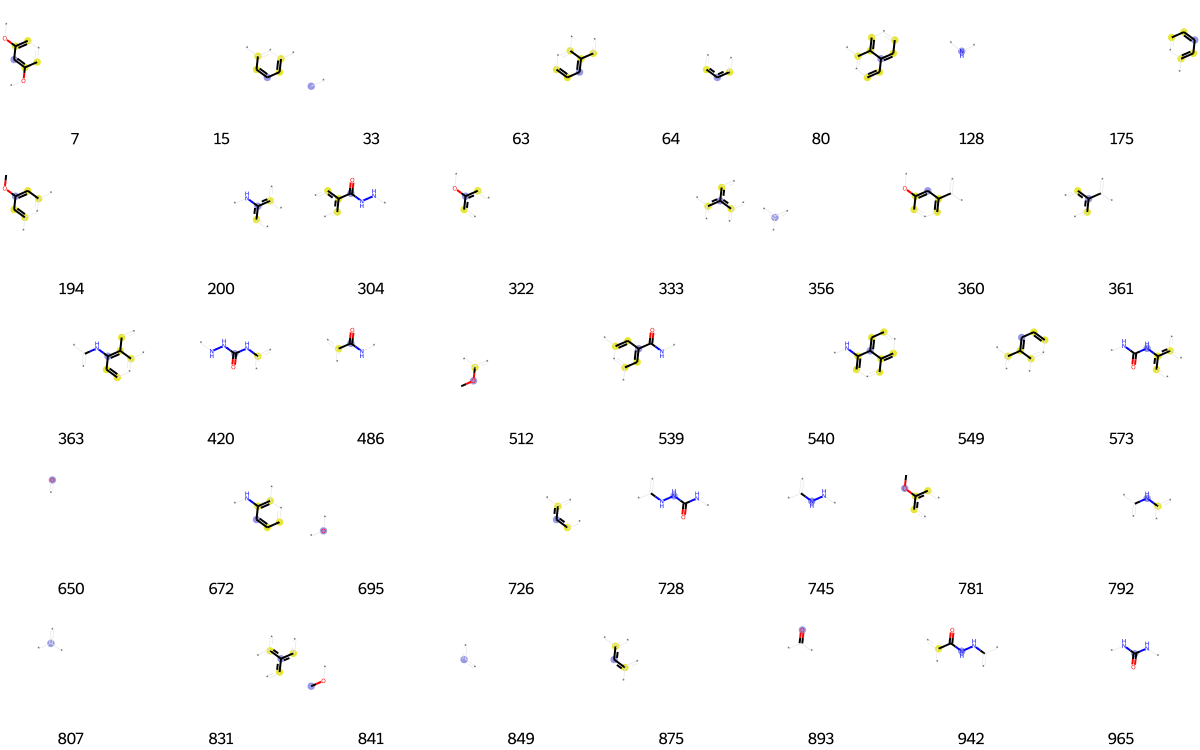

In [75]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [76]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 26,
 29,
 80,
 94,
 112,
 128,
 142,
 301,
 335,
 356,
 361,
 366,
 378,
 381,
 425,
 428,
 432,
 486,
 511,
 526,
 561,
 579,
 580,
 625,
 647,
 650,
 659,
 664,
 673,
 695,
 723,
 726,
 733,
 747,
 771,
 792,
 807,
 834,
 849,
 859,
 875,
 884,
 893,
 904,
 926,
 946,
 949,
 1019]

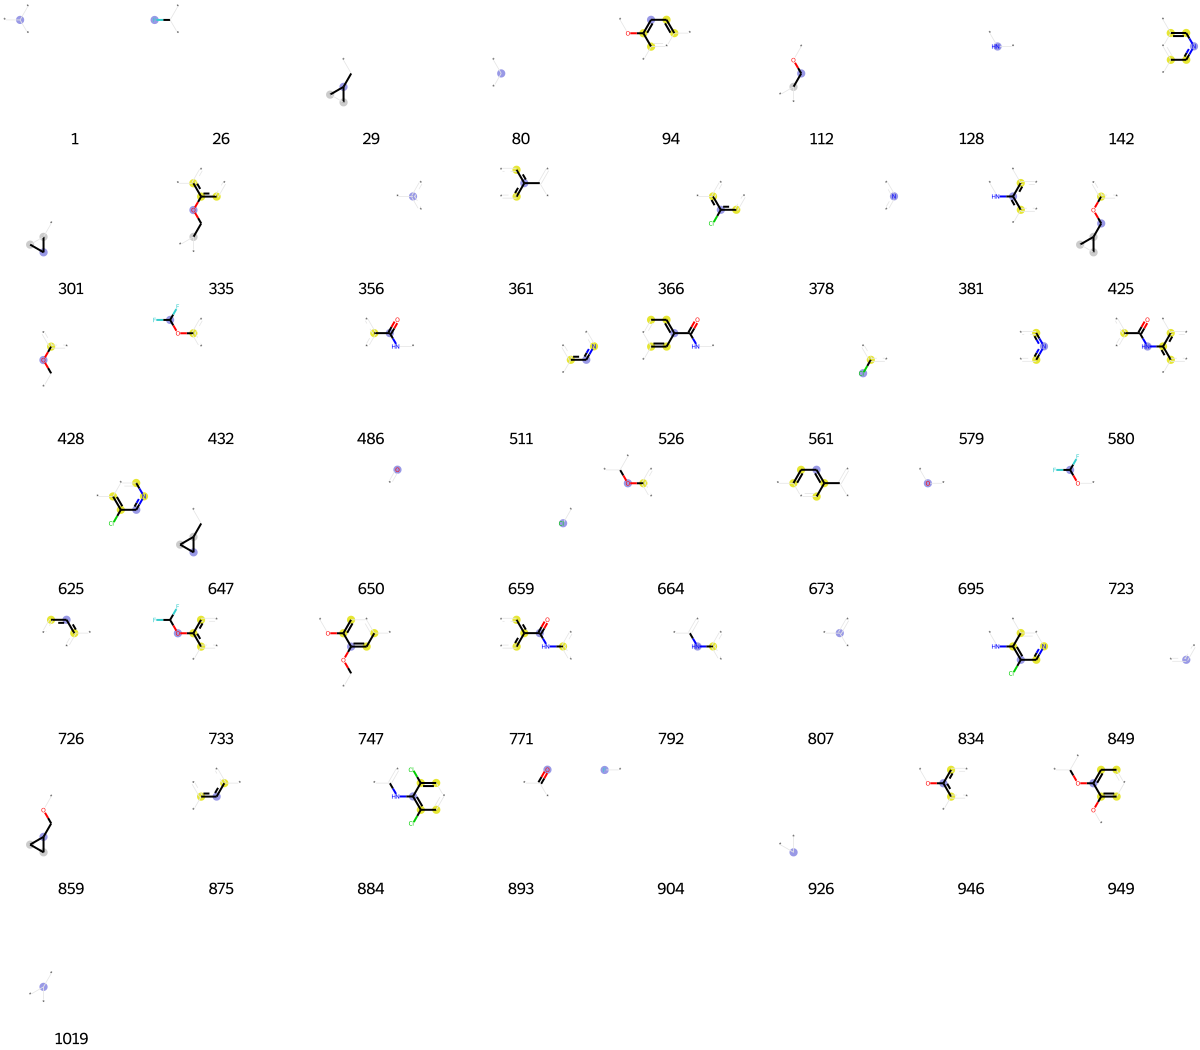

In [77]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [78]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33,
 53,
 114,
 128,
 191,
 202,
 245,
 354,
 356,
 361,
 392,
 486,
 530,
 564,
 603,
 641,
 650,
 658,
 673,
 726,
 792,
 807,
 843,
 849,
 893,
 1017]

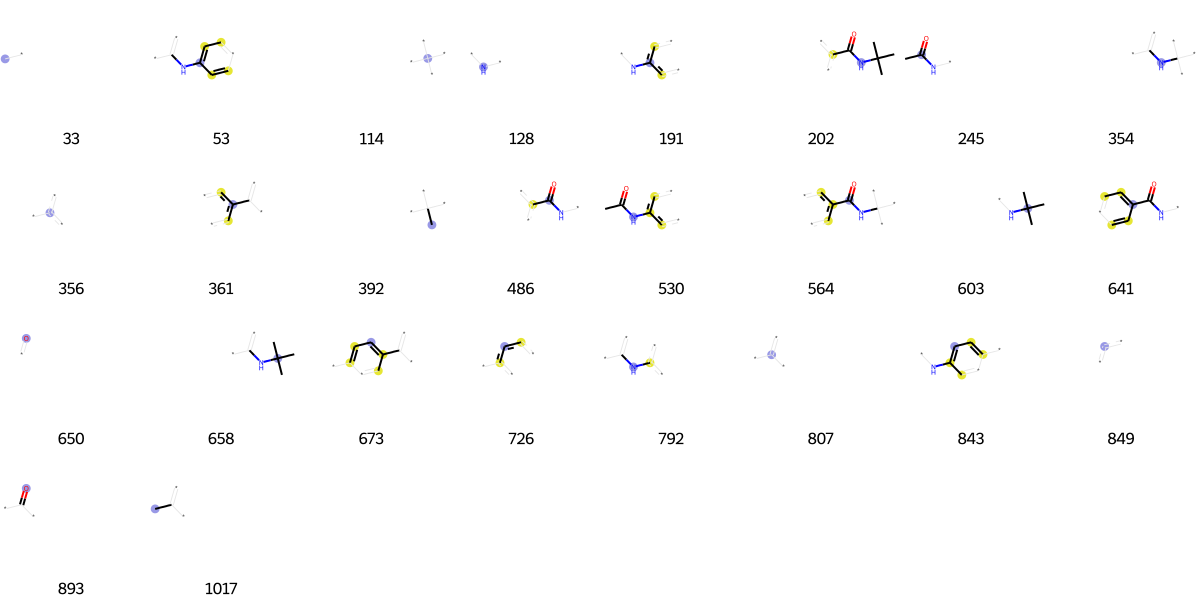

In [79]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [80]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[21,
 33,
 45,
 64,
 73,
 80,
 90,
 119,
 121,
 128,
 144,
 157,
 175,
 218,
 219,
 237,
 261,
 289,
 301,
 310,
 322,
 335,
 356,
 357,
 378,
 386,
 394,
 456,
 458,
 512,
 549,
 565,
 587,
 610,
 646,
 659,
 695,
 699,
 718,
 726,
 730,
 741,
 767,
 774,
 781,
 788,
 802,
 831,
 841,
 849,
 888,
 904,
 926,
 935,
 1019]

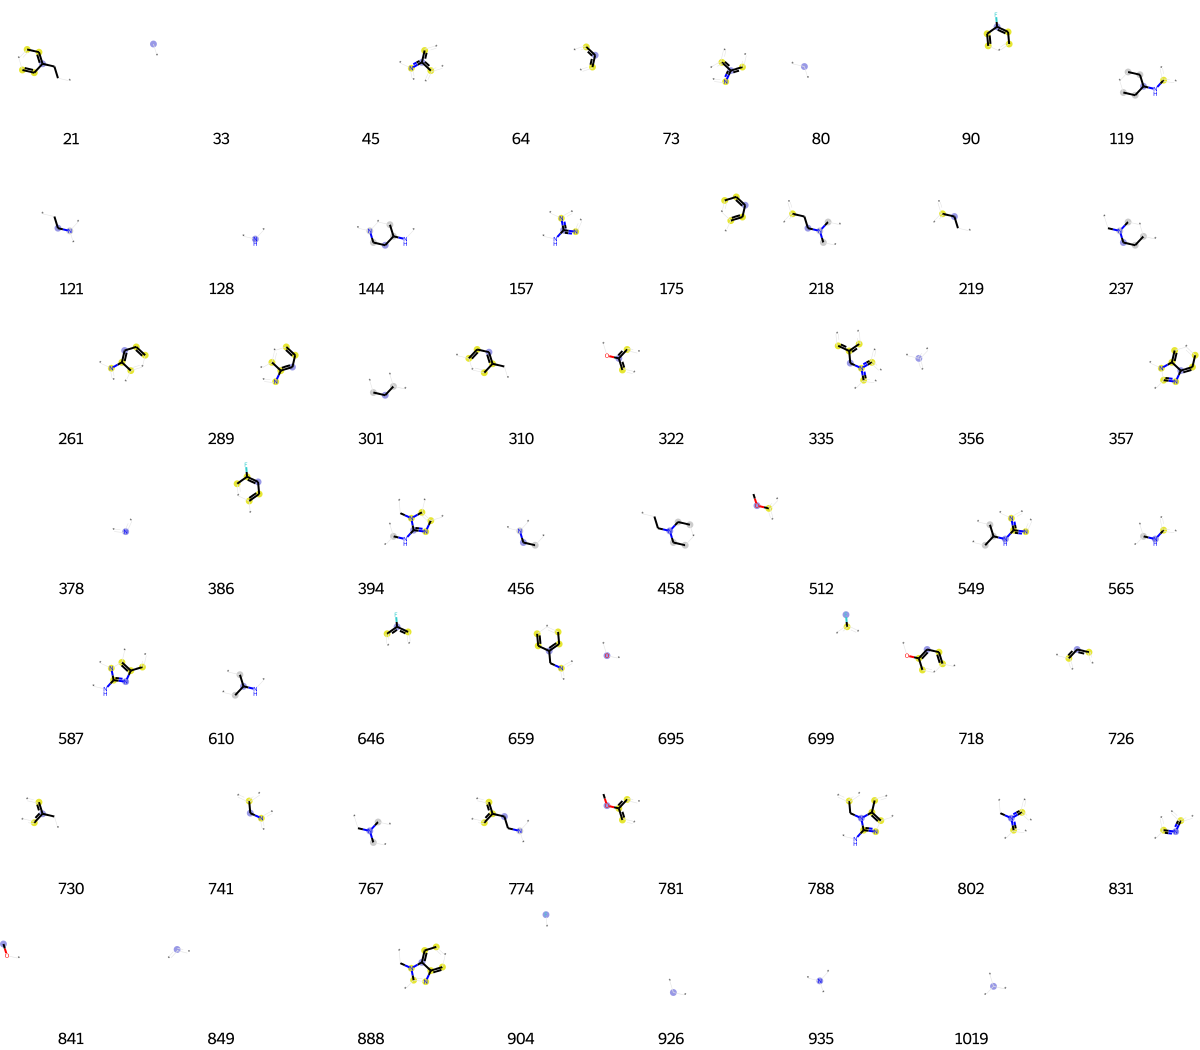

In [81]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [82]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33,
 54,
 121,
 136,
 157,
 167,
 314,
 322,
 356,
 472,
 501,
 512,
 578,
 580,
 583,
 630,
 650,
 656,
 666,
 695,
 718,
 726,
 732,
 745,
 779,
 781,
 784,
 807,
 831,
 841,
 849,
 865,
 875,
 896,
 920,
 960,
 992]

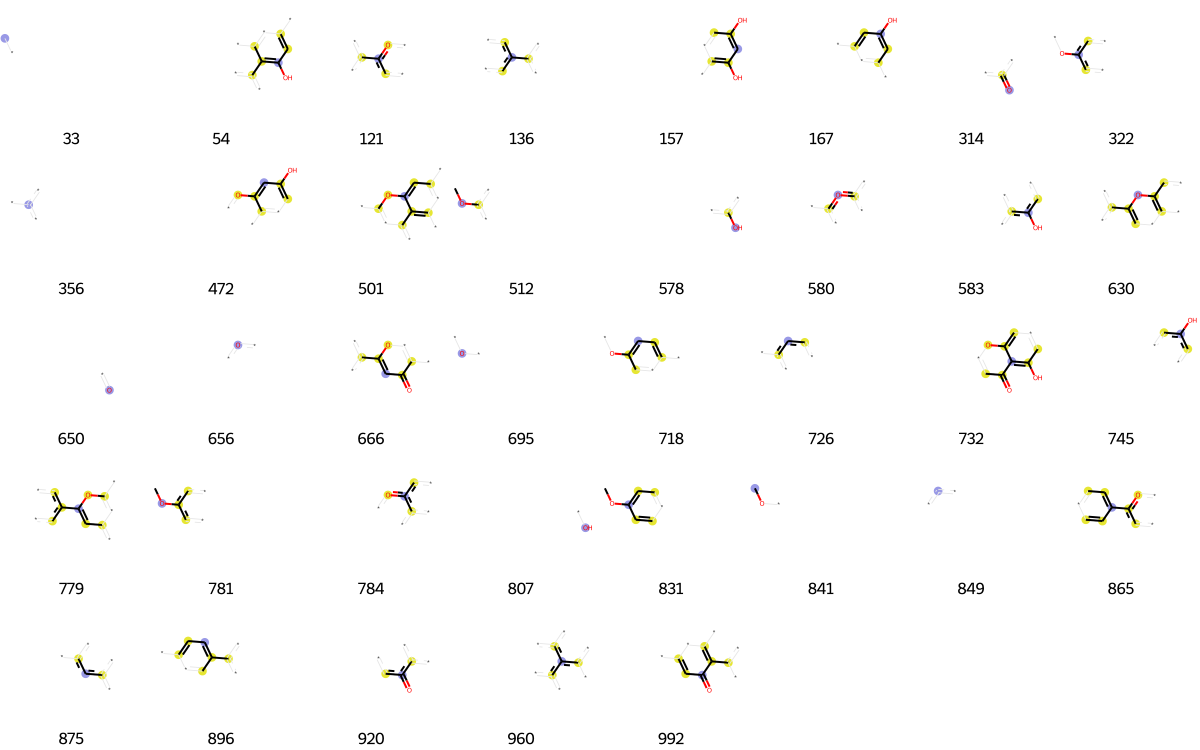

In [83]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [84]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[2,
 29,
 36,
 46,
 80,
 87,
 90,
 128,
 130,
 138,
 147,
 149,
 216,
 286,
 310,
 333,
 338,
 356,
 378,
 407,
 428,
 448,
 456,
 479,
 482,
 489,
 504,
 561,
 567,
 659,
 710,
 711,
 726,
 730,
 786,
 789,
 806,
 816,
 824,
 849,
 926,
 935,
 1009]

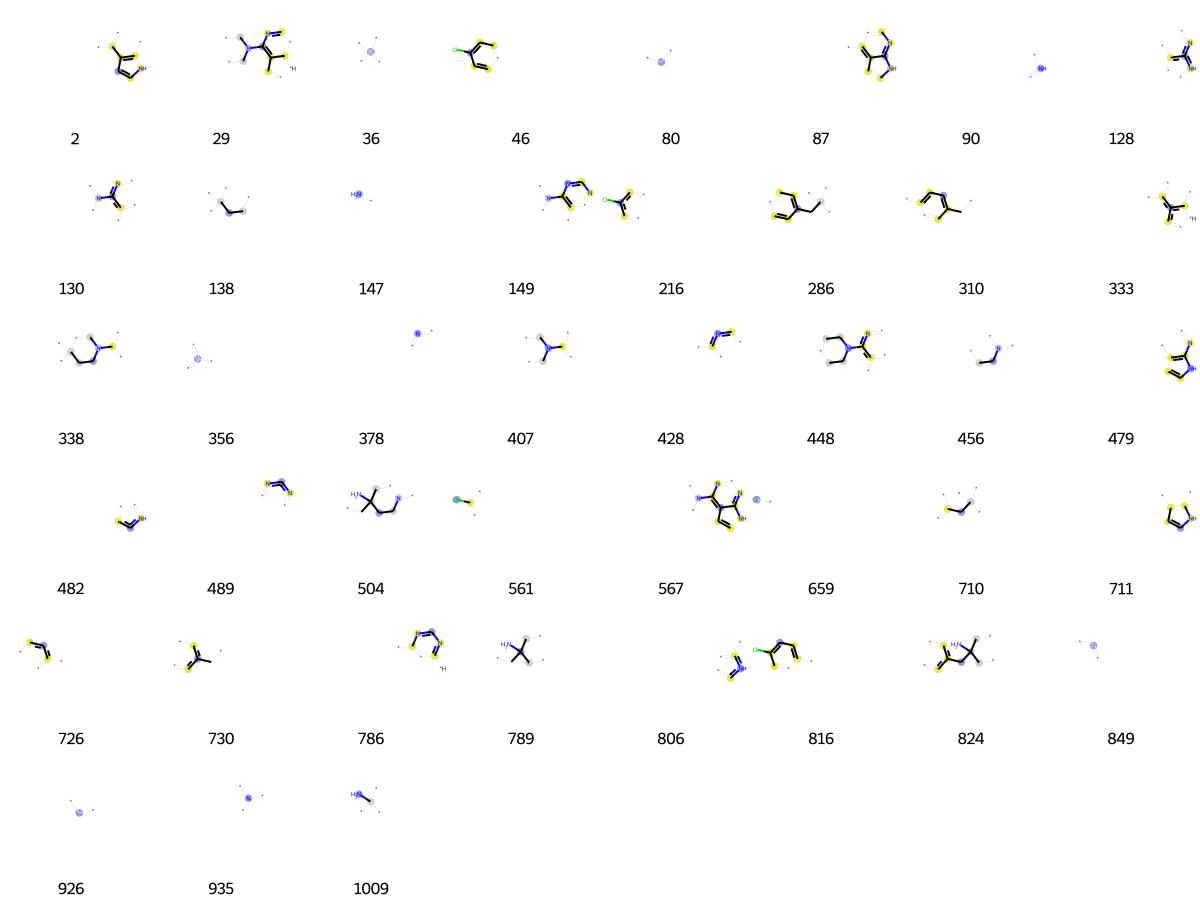

In [85]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [86]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[4,
 14,
 33,
 61,
 73,
 114,
 128,
 198,
 202,
 236,
 246,
 249,
 276,
 307,
 319,
 323,
 333,
 350,
 352,
 356,
 378,
 385,
 393,
 428,
 429,
 452,
 479,
 489,
 498,
 501,
 502,
 512,
 543,
 553,
 554,
 588,
 641,
 650,
 673,
 675,
 680,
 695,
 709,
 715,
 726,
 771,
 786,
 809,
 828,
 841,
 842,
 849,
 875,
 904,
 905,
 946,
 976,
 1022]

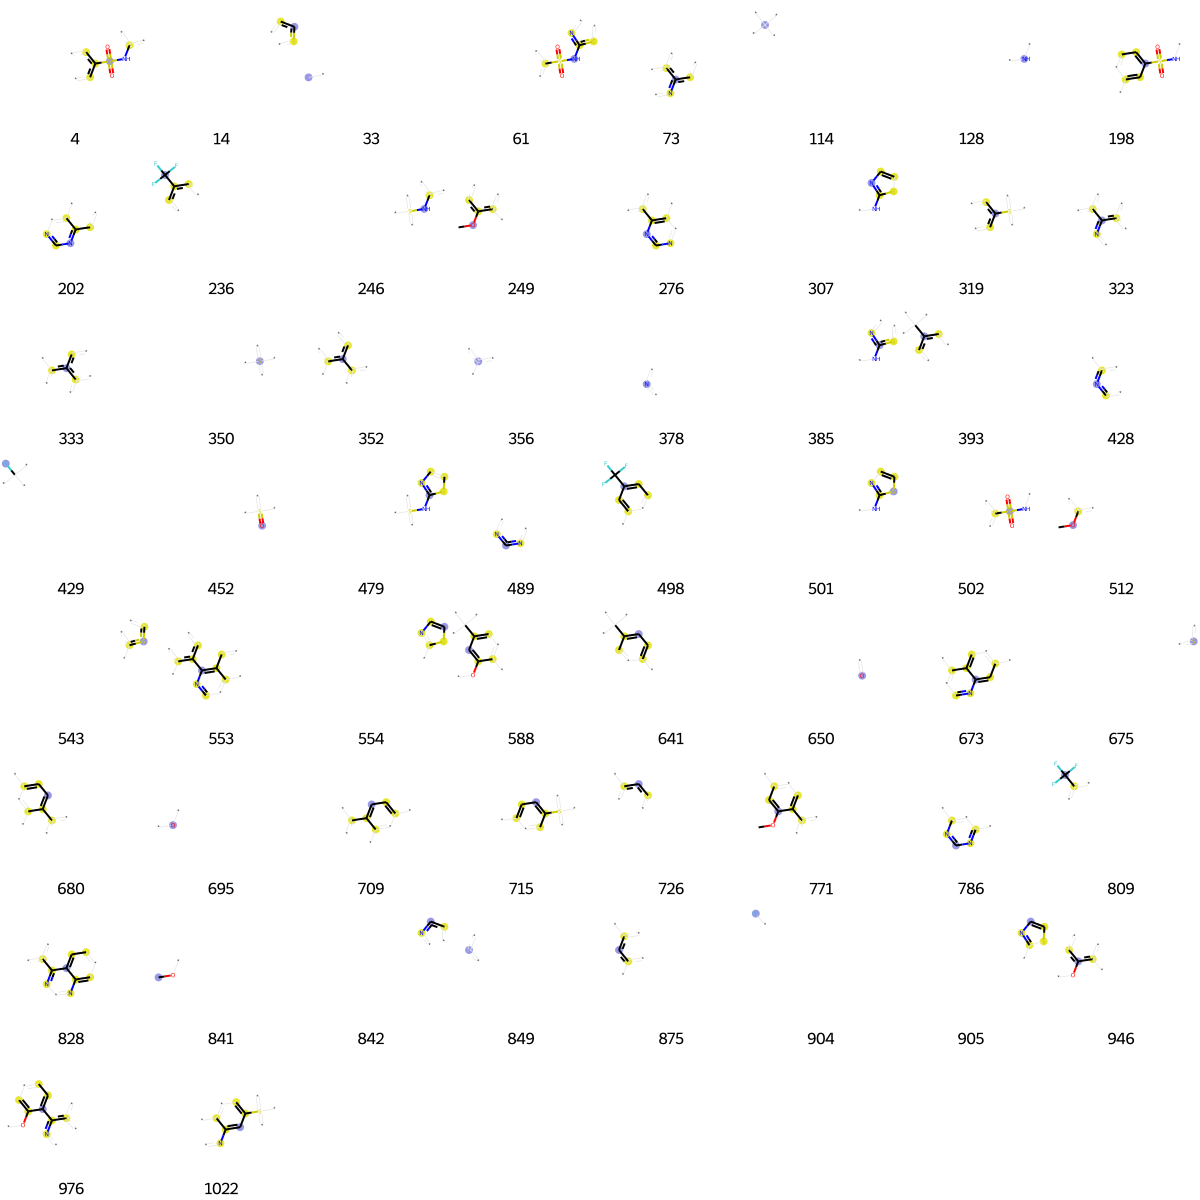

In [87]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [88]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 3,
 27,
 33,
 36,
 64,
 80,
 90,
 99,
 117,
 128,
 175,
 207,
 236,
 237,
 249,
 255,
 266,
 294,
 313,
 325,
 327,
 356,
 372,
 389,
 469,
 512,
 521,
 543,
 591,
 595,
 639,
 650,
 677,
 679,
 695,
 702,
 713,
 720,
 726,
 733,
 782,
 792,
 794,
 795,
 807,
 813,
 826,
 841,
 849,
 865,
 875,
 876,
 887,
 893,
 911,
 924,
 926,
 946,
 996,
 1011,
 1019]

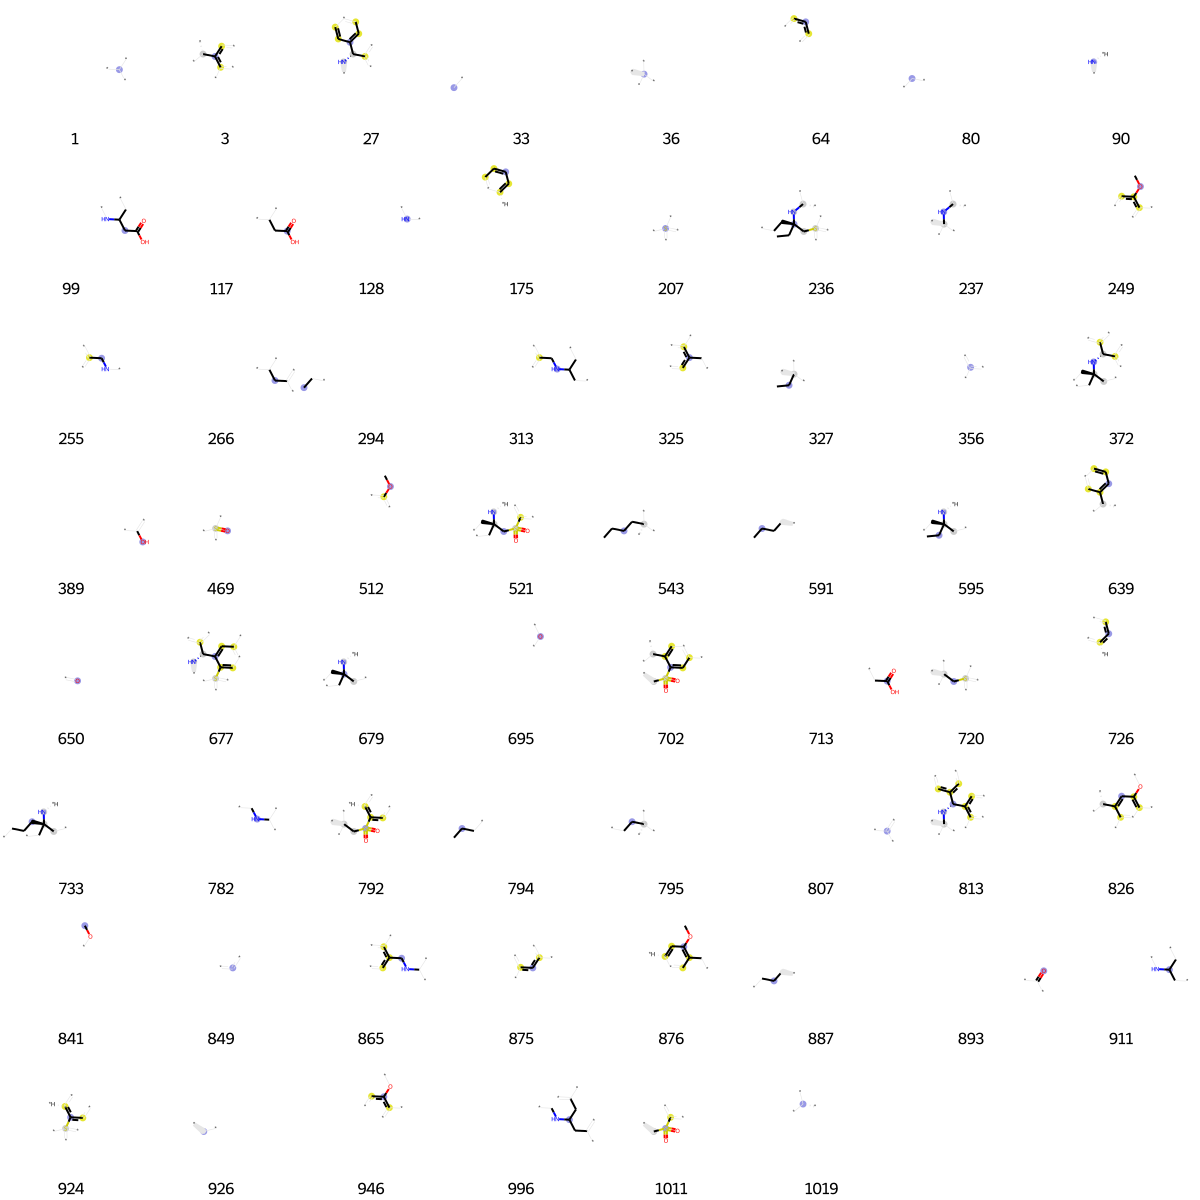

In [89]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [90]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[21,
 80,
 219,
 222,
 289,
 310,
 356,
 473,
 574,
 578,
 726,
 730,
 745,
 754,
 807,
 849,
 867]

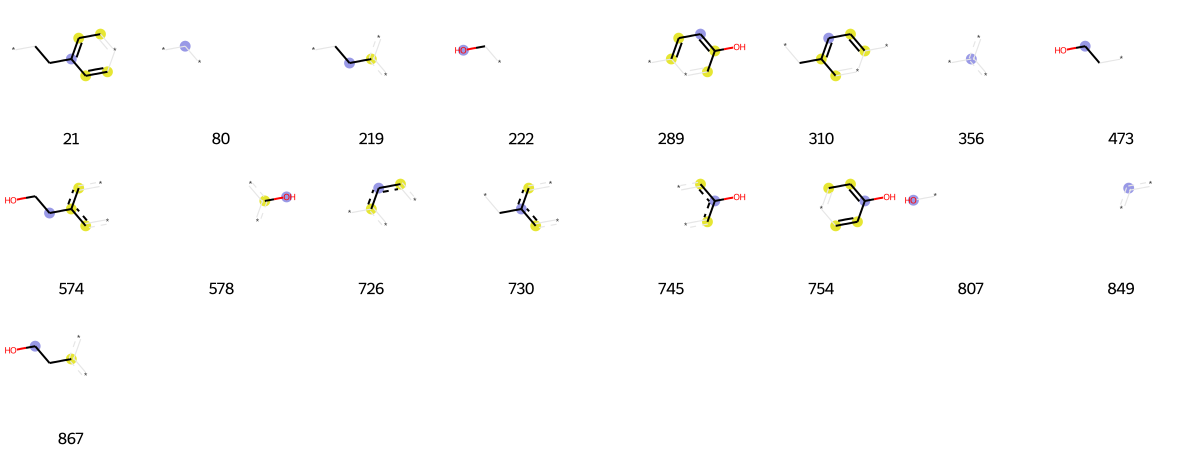

In [91]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [92]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[19,
 33,
 64,
 102,
 111,
 128,
 130,
 171,
 184,
 199,
 216,
 247,
 267,
 345,
 352,
 356,
 366,
 367,
 378,
 381,
 406,
 415,
 426,
 428,
 448,
 486,
 488,
 495,
 561,
 580,
 607,
 638,
 650,
 655,
 659,
 698,
 723,
 726,
 728,
 792,
 807,
 813,
 828,
 842,
 849,
 875,
 893,
 898,
 930,
 932,
 935,
 967,
 974,
 997]

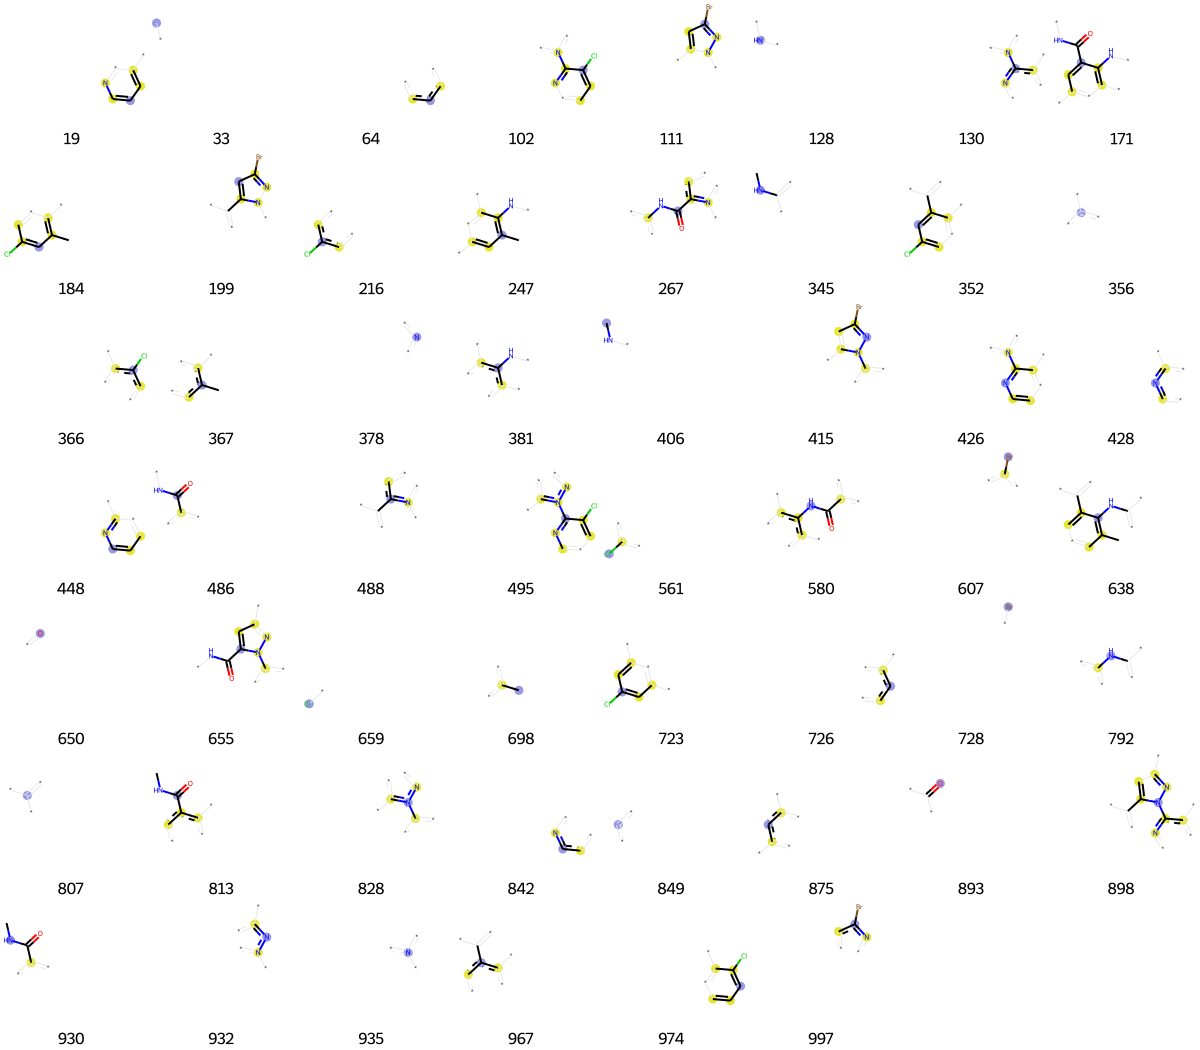

In [93]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [94]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[14,
 33,
 90,
 128,
 136,
 158,
 249,
 288,
 314,
 322,
 352,
 356,
 378,
 428,
 437,
 439,
 512,
 552,
 562,
 635,
 675,
 680,
 695,
 718,
 724,
 726,
 745,
 771,
 781,
 782,
 787,
 806,
 841,
 842,
 849,
 855,
 856,
 868,
 875,
 891,
 927,
 946,
 948,
 960,
 977,
 987]

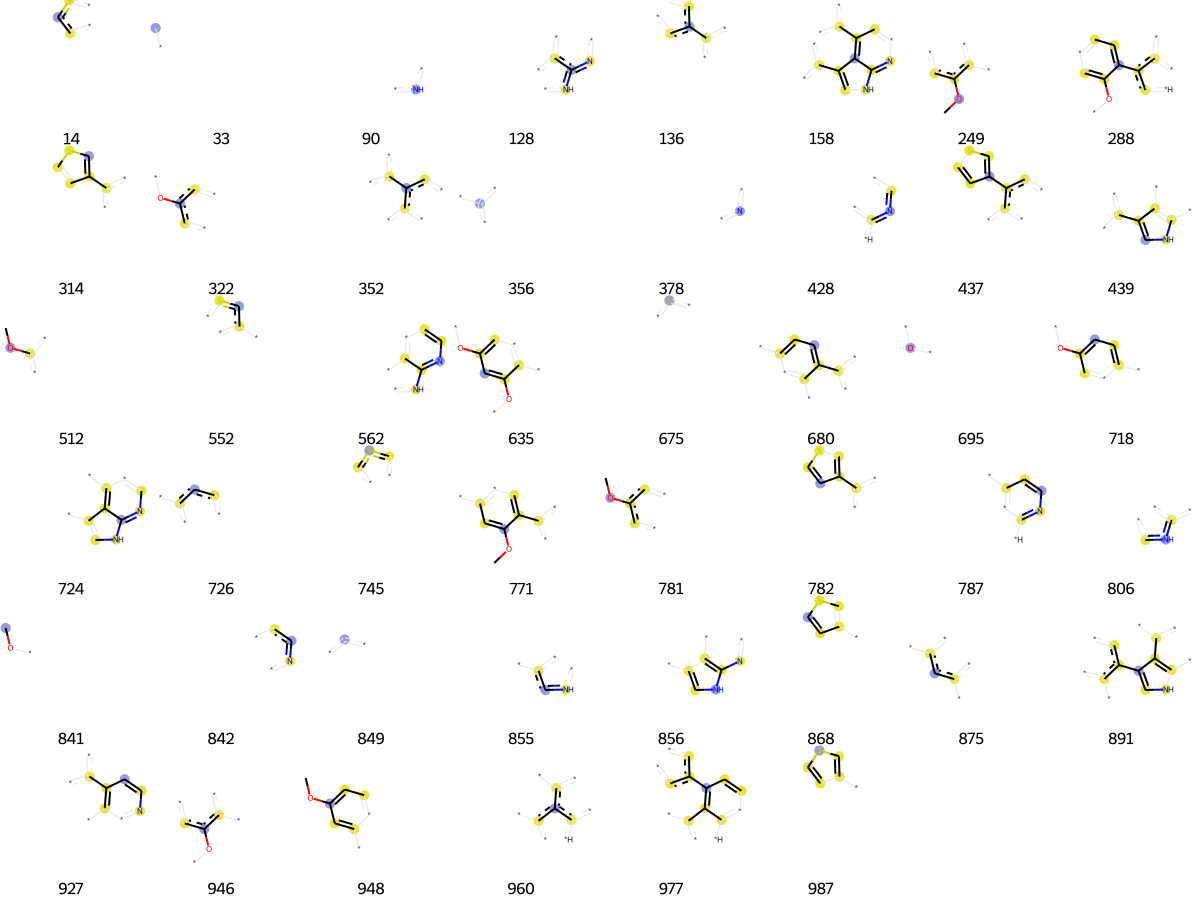

In [95]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [96]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[5,
 33,
 39,
 42,
 64,
 66,
 70,
 74,
 80,
 83,
 84,
 90,
 121,
 128,
 175,
 236,
 271,
 314,
 356,
 358,
 369,
 378,
 387,
 389,
 404,
 406,
 422,
 441,
 457,
 486,
 496,
 567,
 623,
 641,
 650,
 656,
 698,
 722,
 726,
 730,
 803,
 807,
 831,
 849,
 881,
 893,
 899,
 926,
 935,
 976,
 980,
 987,
 1000,
 1019,
 1022]

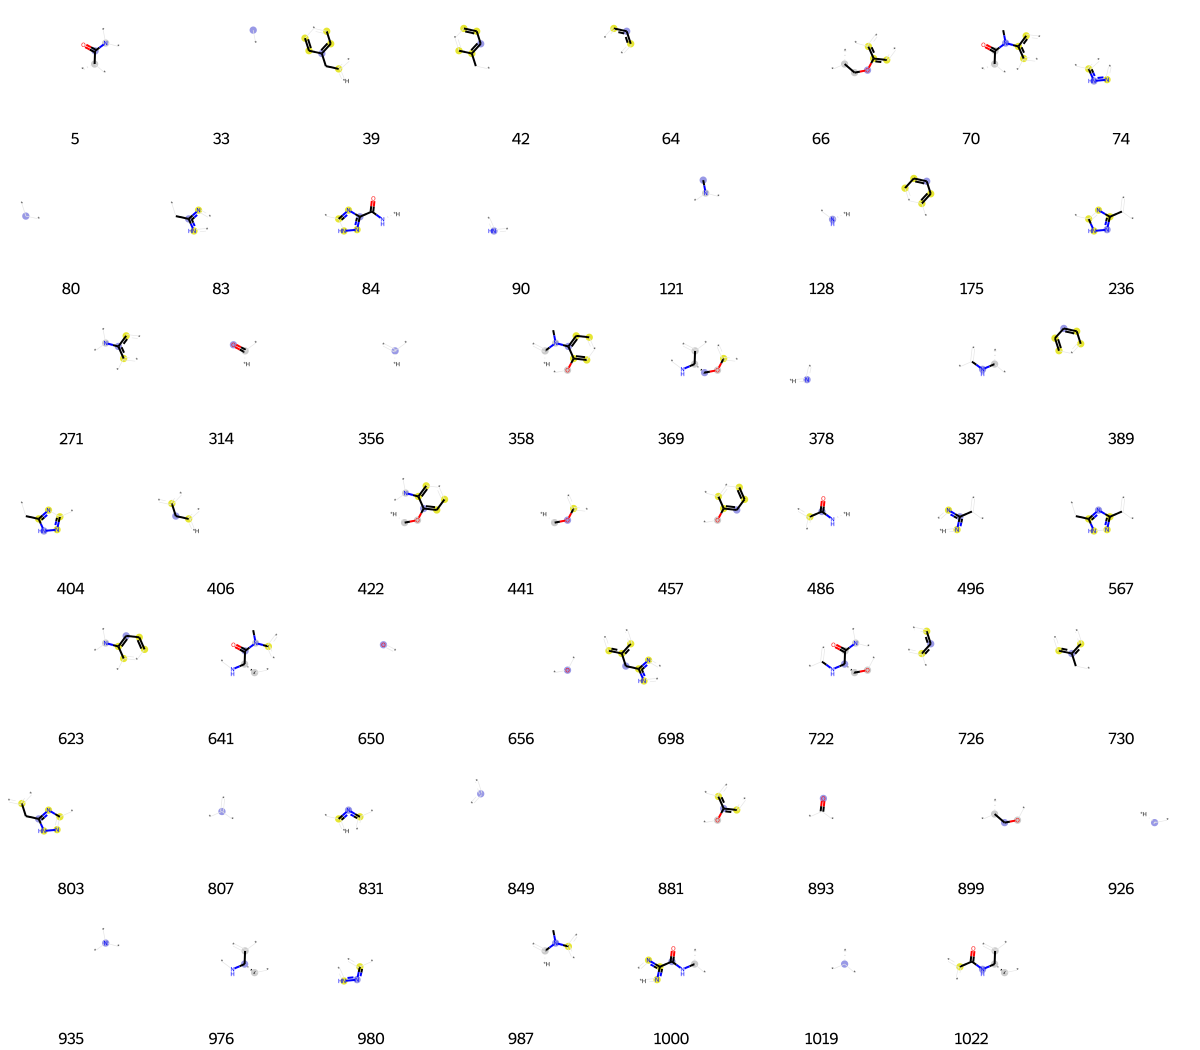

In [97]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [98]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[3,
 13,
 33,
 40,
 80,
 102,
 121,
 128,
 147,
 162,
 207,
 294,
 306,
 338,
 350,
 356,
 404,
 437,
 452,
 462,
 469,
 486,
 497,
 545,
 583,
 600,
 618,
 650,
 659,
 675,
 688,
 695,
 702,
 722,
 739,
 805,
 833,
 841,
 849,
 875,
 887,
 926,
 935,
 936,
 942,
 976,
 982,
 990,
 1005,
 1008,
 1019]

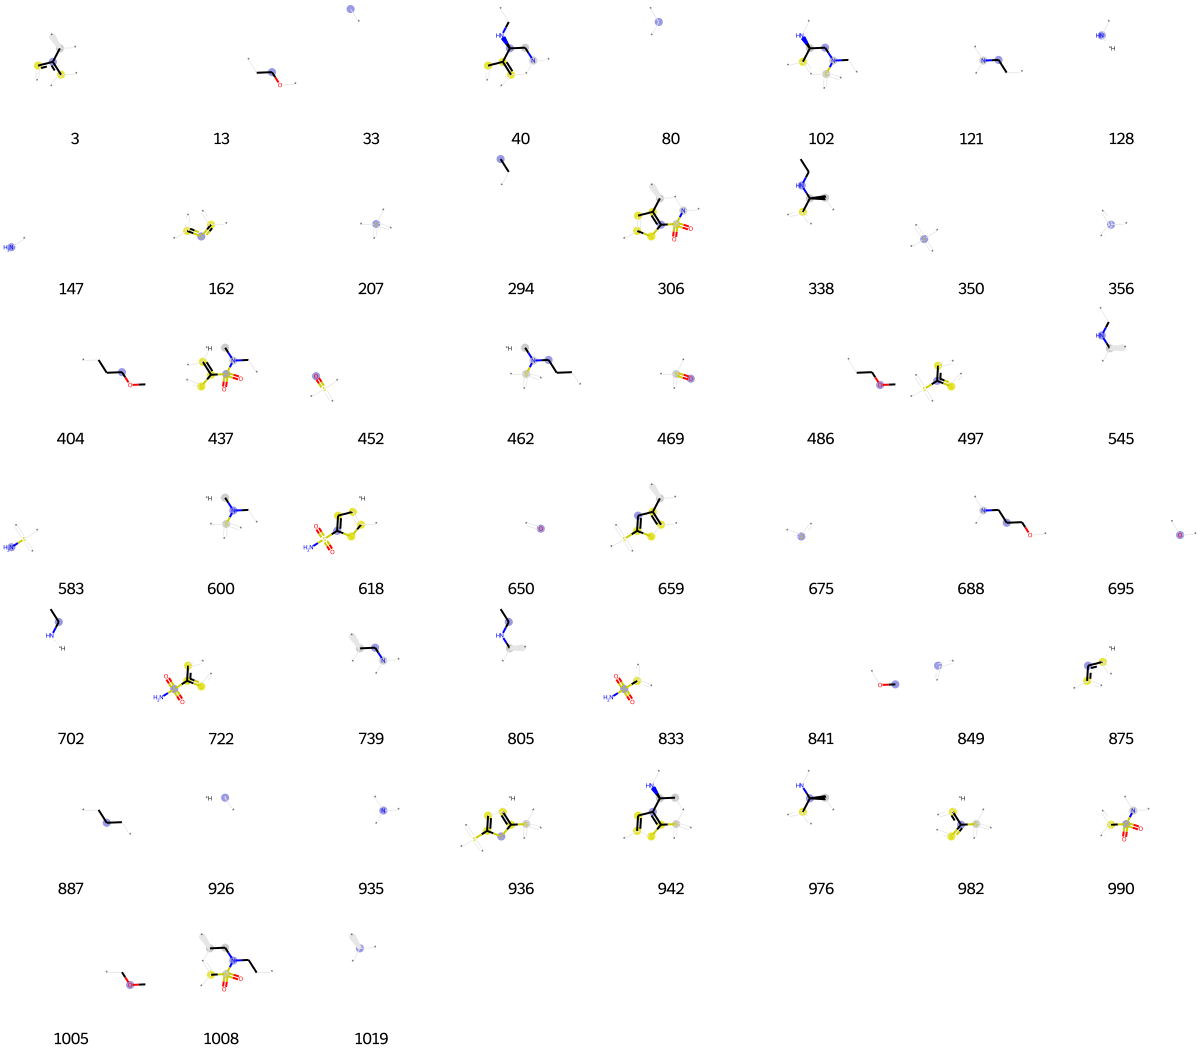

In [99]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [100]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 3,
 33,
 43,
 77,
 80,
 90,
 94,
 97,
 118,
 119,
 194,
 200,
 227,
 252,
 275,
 277,
 283,
 297,
 309,
 312,
 315,
 324,
 329,
 333,
 356,
 378,
 397,
 401,
 405,
 416,
 421,
 428,
 464,
 489,
 503,
 593,
 695,
 698,
 699,
 702,
 721,
 726,
 807,
 817,
 849,
 875,
 878,
 898,
 904,
 913,
 915,
 935,
 946,
 1023]

In [101]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[29,
 53,
 58,
 74,
 80,
 90,
 136,
 166,
 168,
 171,
 185,
 204,
 209,
 211,
 233,
 235,
 301,
 314,
 318,
 340,
 356,
 378,
 454,
 456,
 458,
 511,
 561,
 600,
 645,
 650,
 652,
 656,
 687,
 726,
 736,
 739,
 758,
 784,
 785,
 786,
 787,
 800,
 801,
 807,
 831,
 849,
 875,
 877,
 893,
 896,
 898,
 926,
 935,
 940,
 969,
 974,
 980,
 983,
 985,
 1019]

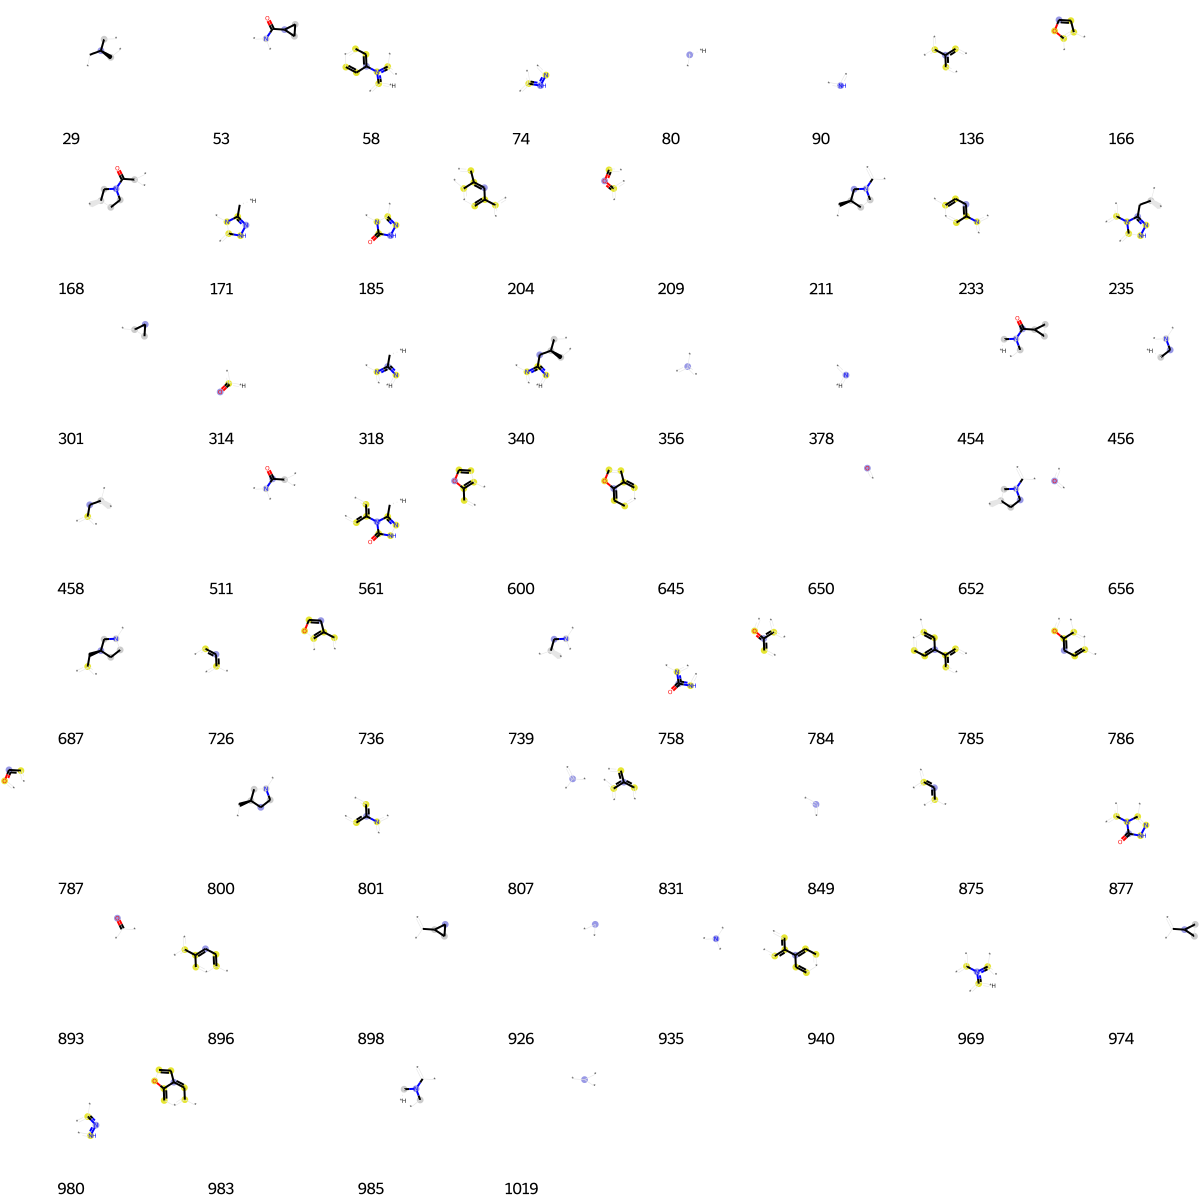

In [102]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [103]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 2,
 15,
 33,
 64,
 80,
 90,
 94,
 112,
 119,
 128,
 133,
 157,
 165,
 180,
 200,
 216,
 222,
 227,
 257,
 259,
 314,
 338,
 341,
 348,
 356,
 367,
 378,
 381,
 392,
 407,
 410,
 417,
 456,
 482,
 523,
 540,
 557,
 561,
 577,
 585,
 592,
 606,
 632,
 650,
 656,
 659,
 672,
 687,
 698,
 700,
 711,
 721,
 723,
 726,
 750,
 801,
 806,
 807,
 831,
 849,
 863,
 875,
 926,
 935,
 950,
 1014,
 1019]

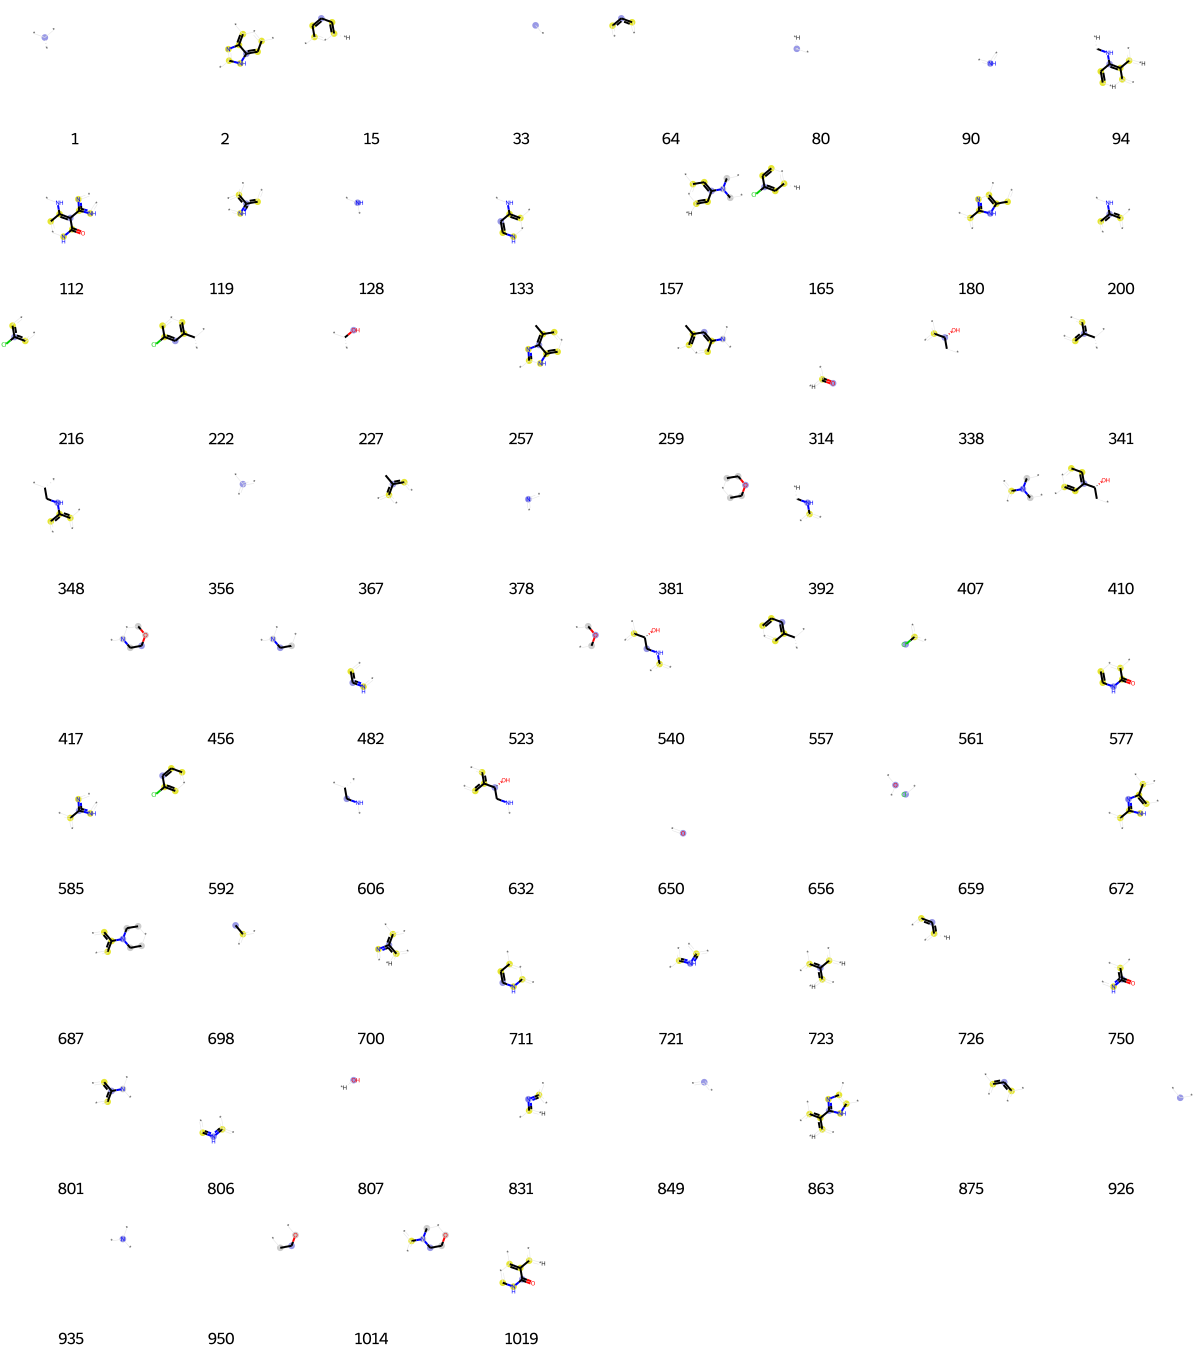

In [104]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [105]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[4,
 13,
 33,
 73,
 77,
 80,
 90,
 94,
 119,
 121,
 202,
 221,
 249,
 275,
 277,
 315,
 324,
 333,
 356,
 378,
 398,
 401,
 421,
 428,
 456,
 458,
 489,
 494,
 503,
 512,
 554,
 593,
 624,
 653,
 673,
 688,
 695,
 698,
 699,
 721,
 726,
 747,
 767,
 780,
 786,
 841,
 849,
 875,
 878,
 887,
 898,
 904,
 915,
 926,
 935,
 946,
 974,
 987,
 1023]

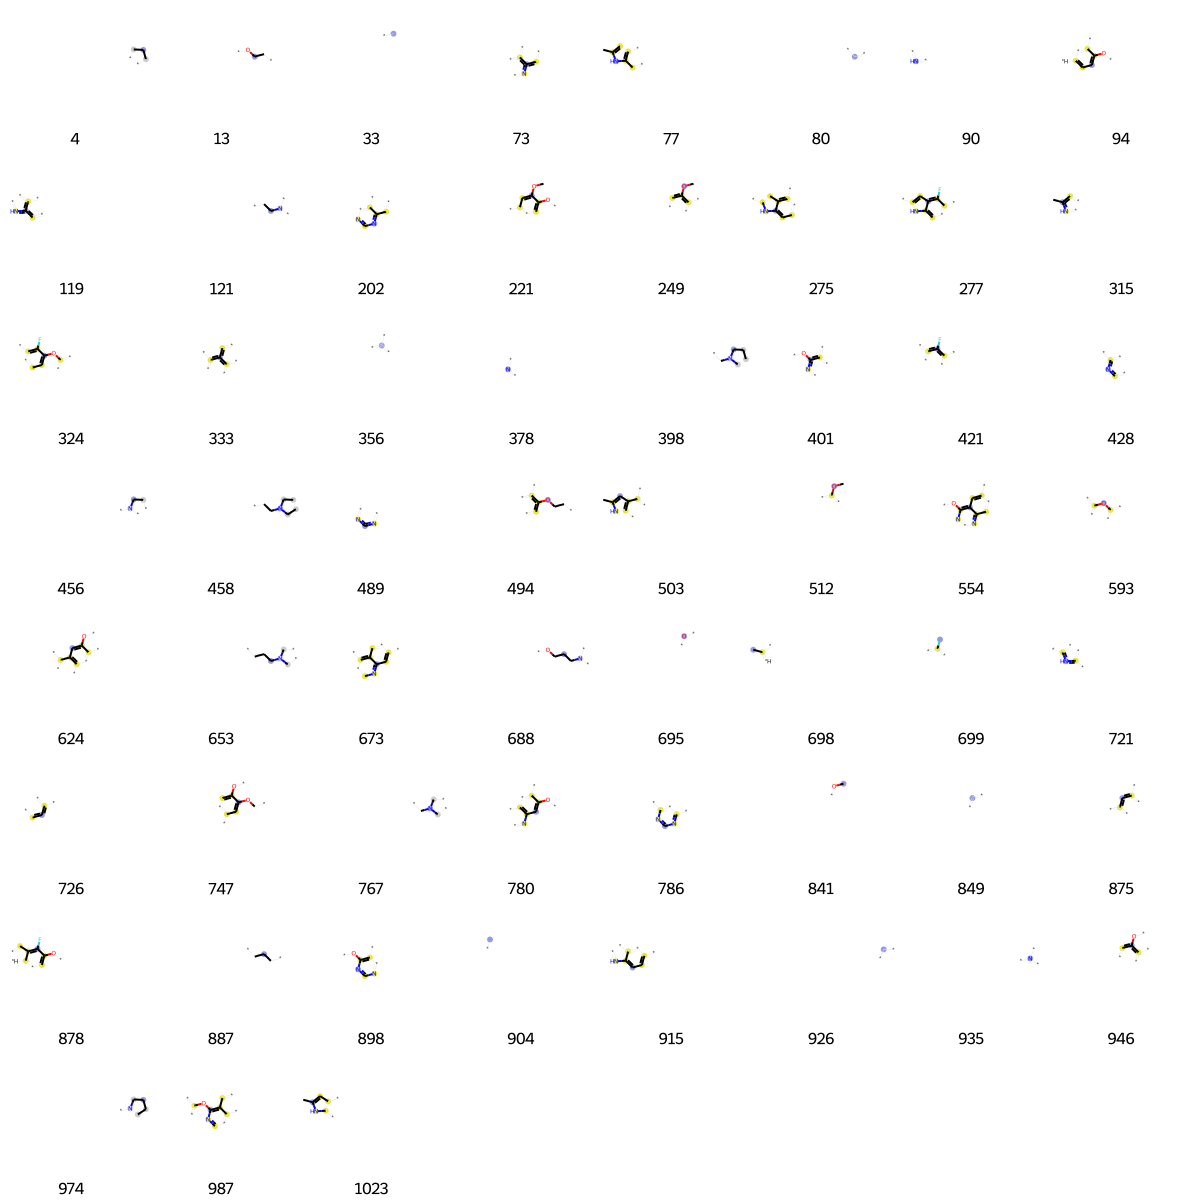

In [106]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [107]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[19,
 33,
 53,
 64,
 102,
 114,
 128,
 130,
 191,
 218,
 315,
 356,
 357,
 366,
 375,
 378,
 392,
 393,
 407,
 426,
 428,
 444,
 448,
 456,
 484,
 532,
 561,
 565,
 641,
 650,
 659,
 726,
 792,
 807,
 842,
 843,
 849,
 893,
 926,
 935,
 974,
 985]

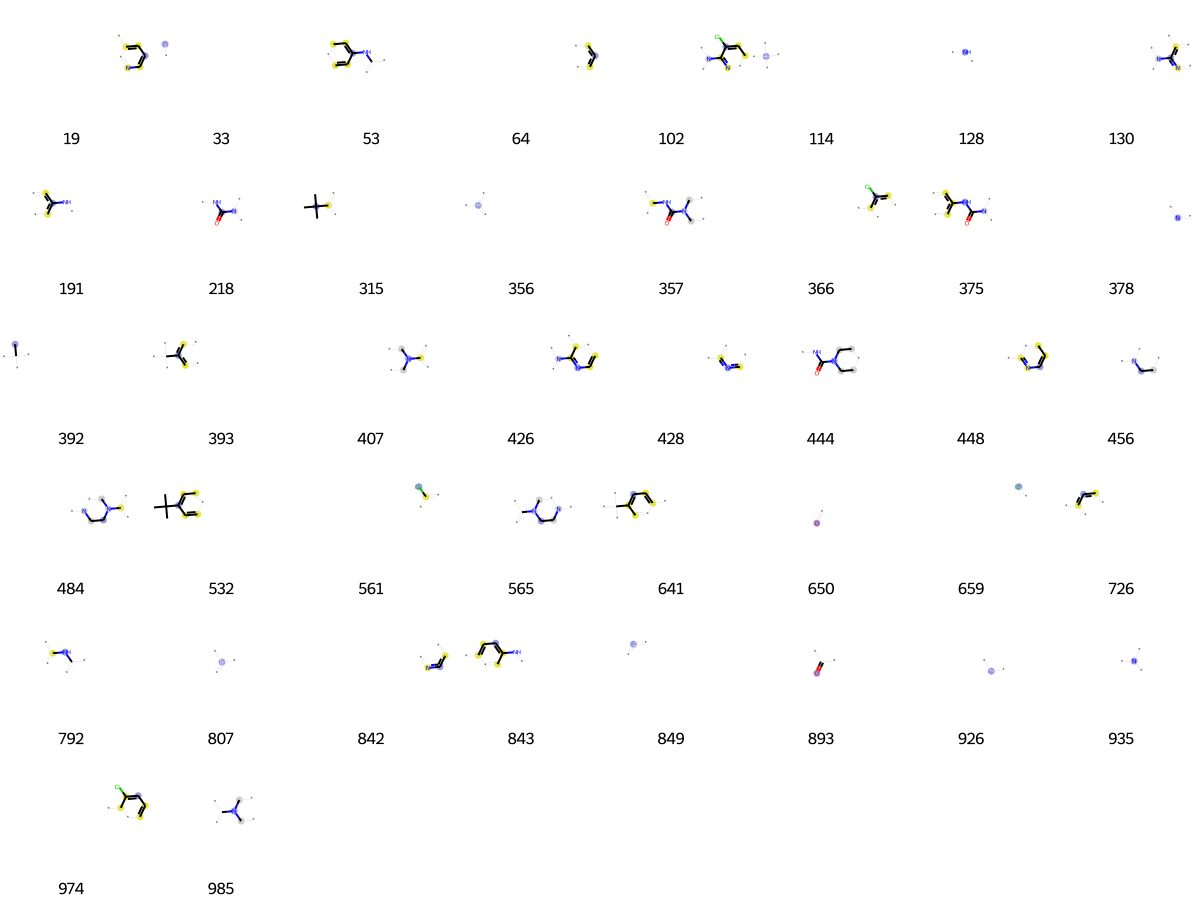

In [108]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [109]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[9,
 73,
 80,
 90,
 119,
 128,
 180,
 200,
 212,
 301,
 310,
 323,
 343,
 356,
 359,
 373,
 378,
 381,
 387,
 410,
 417,
 456,
 523,
 560,
 573,
 585,
 610,
 631,
 634,
 650,
 656,
 685,
 695,
 721,
 726,
 730,
 741,
 744,
 747,
 767,
 784,
 788,
 792,
 807,
 811,
 825,
 831,
 849,
 855,
 872,
 875,
 893,
 926,
 935,
 950,
 961,
 965,
 980,
 1018,
 1019]

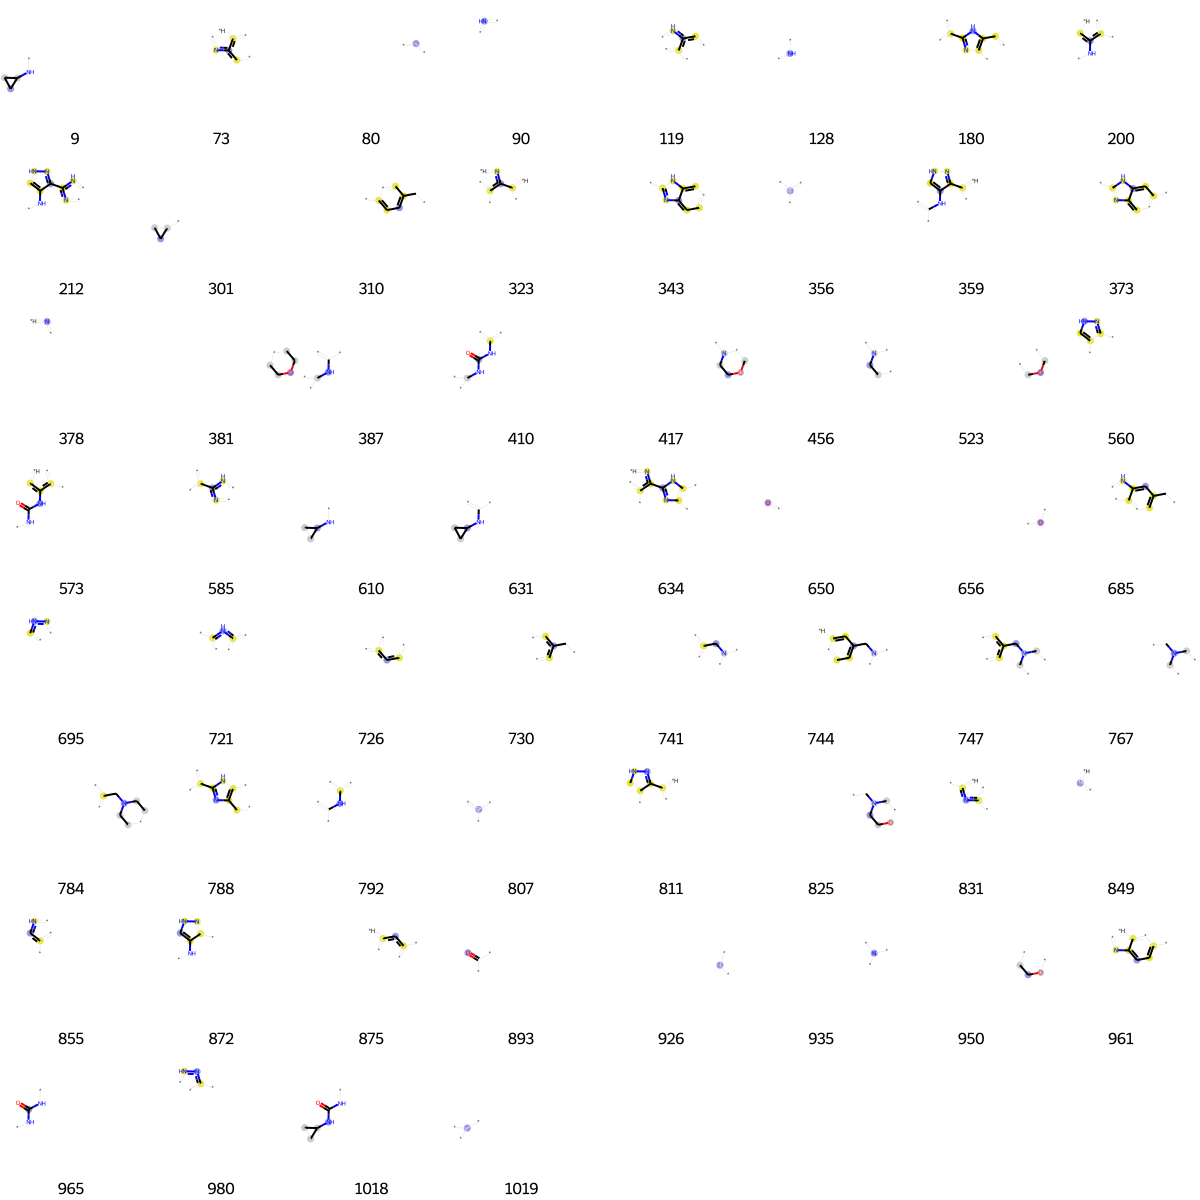

In [110]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [111]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 33,
 43,
 45,
 80,
 90,
 115,
 123,
 128,
 136,
 151,
 157,
 197,
 217,
 219,
 231,
 237,
 241,
 242,
 244,
 255,
 259,
 283,
 293,
 294,
 314,
 315,
 325,
 333,
 346,
 356,
 373,
 378,
 379,
 407,
 428,
 456,
 463,
 484,
 486,
 490,
 511,
 527,
 539,
 603,
 634,
 635,
 649,
 650,
 698,
 702,
 721,
 726,
 750,
 794,
 796,
 804,
 807,
 813,
 827,
 834,
 845,
 849,
 875,
 893,
 896,
 926,
 935,
 945,
 967,
 1005,
 1010,
 1023]

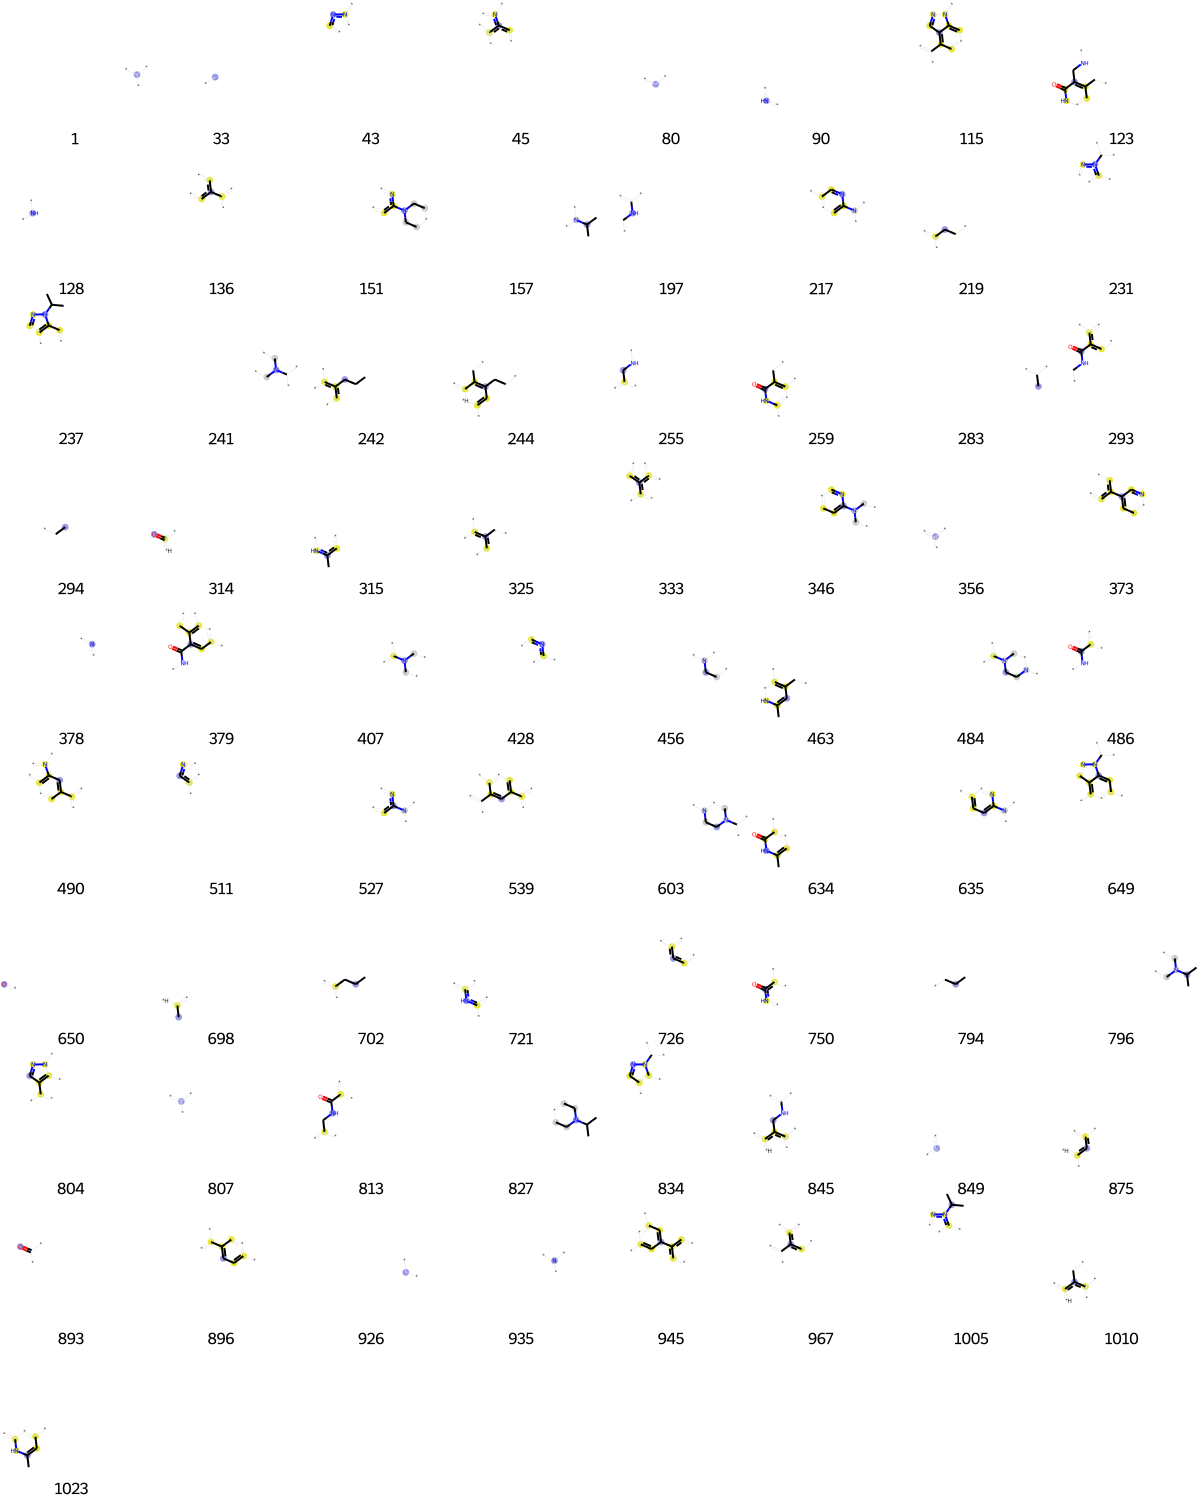

In [112]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [113]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[0,
 29,
 33,
 36,
 43,
 80,
 83,
 134,
 136,
 147,
 223,
 250,
 255,
 258,
 301,
 324,
 356,
 378,
 380,
 389,
 428,
 429,
 433,
 434,
 435,
 489,
 548,
 588,
 647,
 650,
 656,
 677,
 713,
 722,
 726,
 779,
 782,
 786,
 797,
 799,
 807,
 835,
 849,
 876,
 893,
 896,
 926,
 927,
 976,
 1004,
 1019]

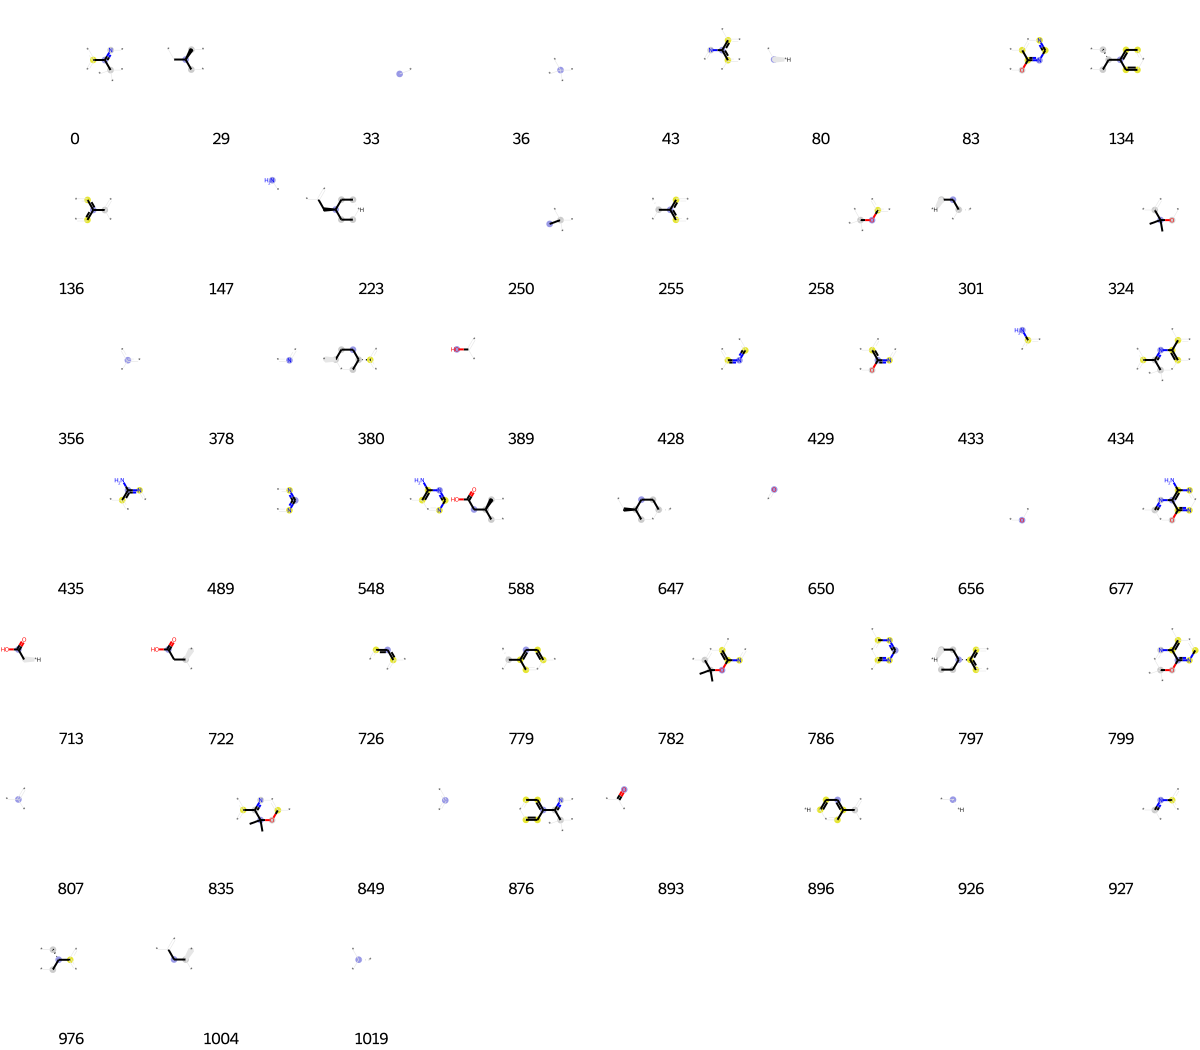

In [114]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [115]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[25,
 33,
 64,
 73,
 80,
 90,
 97,
 114,
 119,
 175,
 192,
 213,
 229,
 252,
 257,
 282,
 289,
 299,
 343,
 356,
 362,
 378,
 397,
 418,
 428,
 429,
 487,
 535,
 647,
 677,
 695,
 698,
 715,
 721,
 726,
 759,
 787,
 809,
 818,
 831,
 842,
 849,
 873,
 904,
 946,
 980,
 984,
 1012]

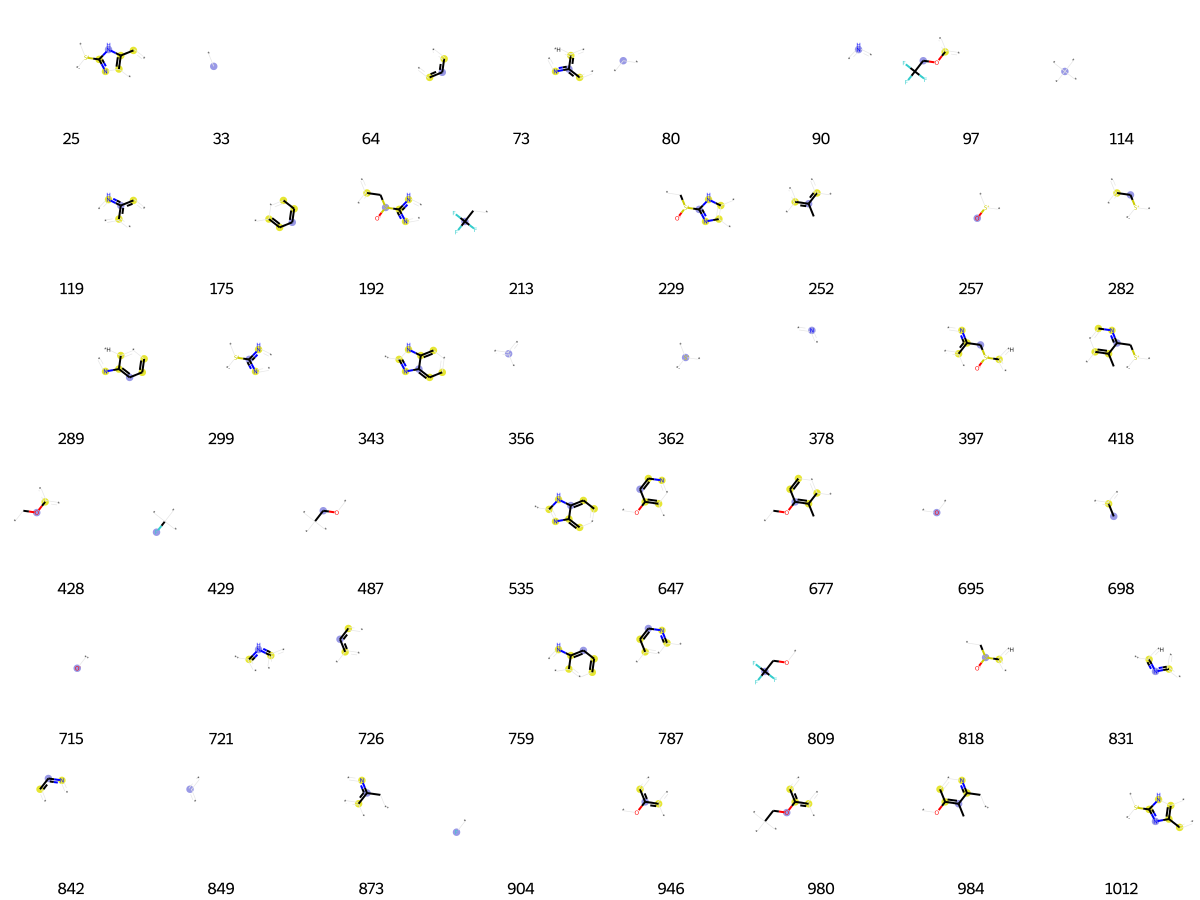

In [116]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [117]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 33,
 80,
 86,
 142,
 174,
 189,
 204,
 227,
 231,
 233,
 256,
 259,
 263,
 294,
 314,
 332,
 356,
 370,
 389,
 401,
 420,
 540,
 549,
 575,
 591,
 600,
 628,
 637,
 650,
 656,
 694,
 713,
 717,
 731,
 739,
 775,
 782,
 794,
 796,
 807,
 813,
 849,
 887,
 893,
 922,
 926,
 989,
 1019]

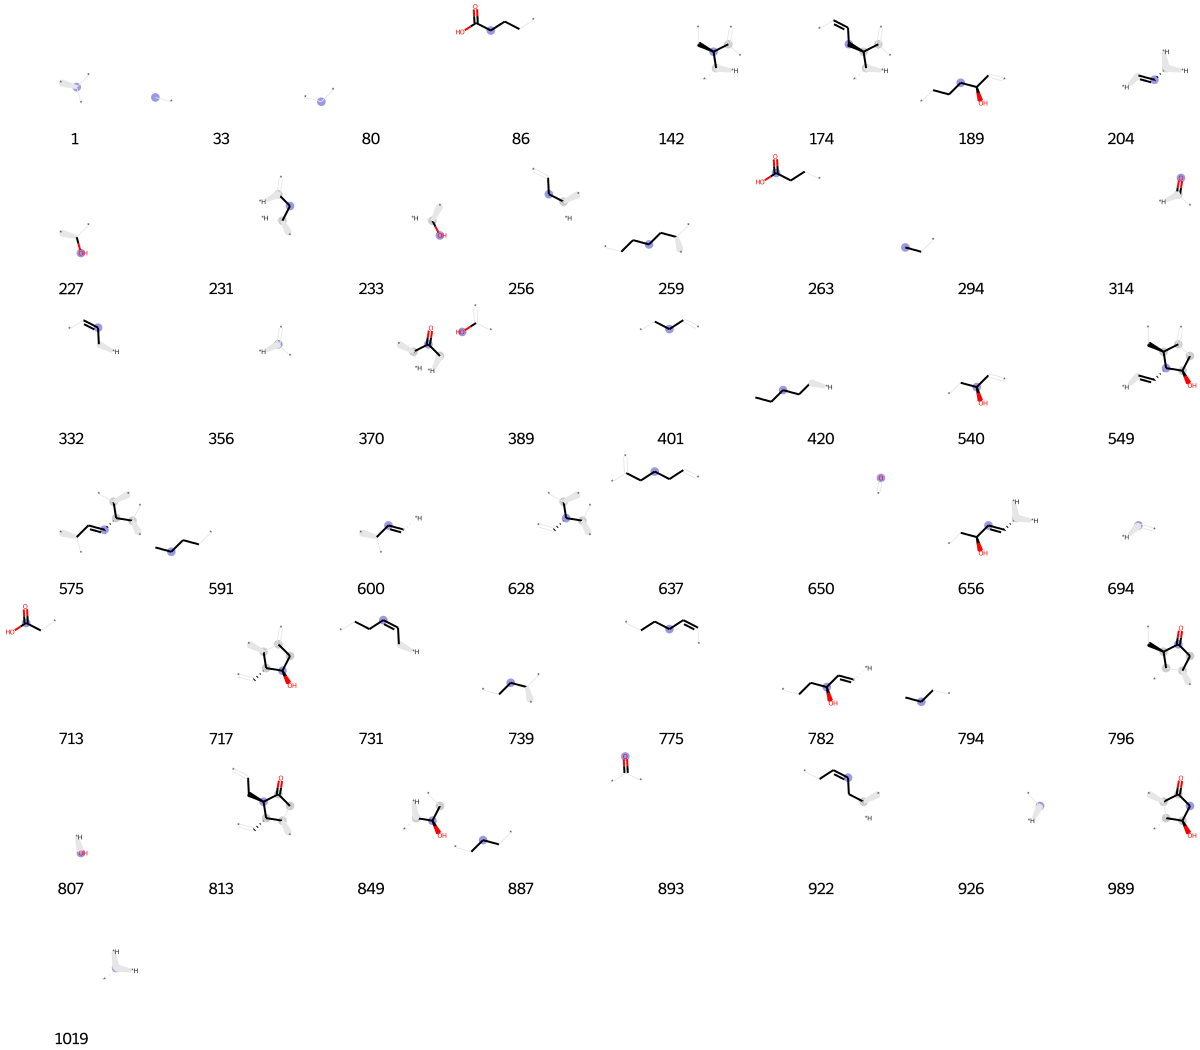

In [118]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [119]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[13,
 15,
 33,
 48,
 62,
 64,
 80,
 90,
 127,
 136,
 162,
 210,
 222,
 233,
 235,
 255,
 315,
 325,
 340,
 356,
 367,
 386,
 406,
 463,
 492,
 504,
 517,
 610,
 646,
 656,
 667,
 670,
 675,
 698,
 699,
 700,
 726,
 727,
 740,
 779,
 807,
 820,
 849,
 858,
 875,
 896,
 897,
 904,
 914,
 970,
 1019]

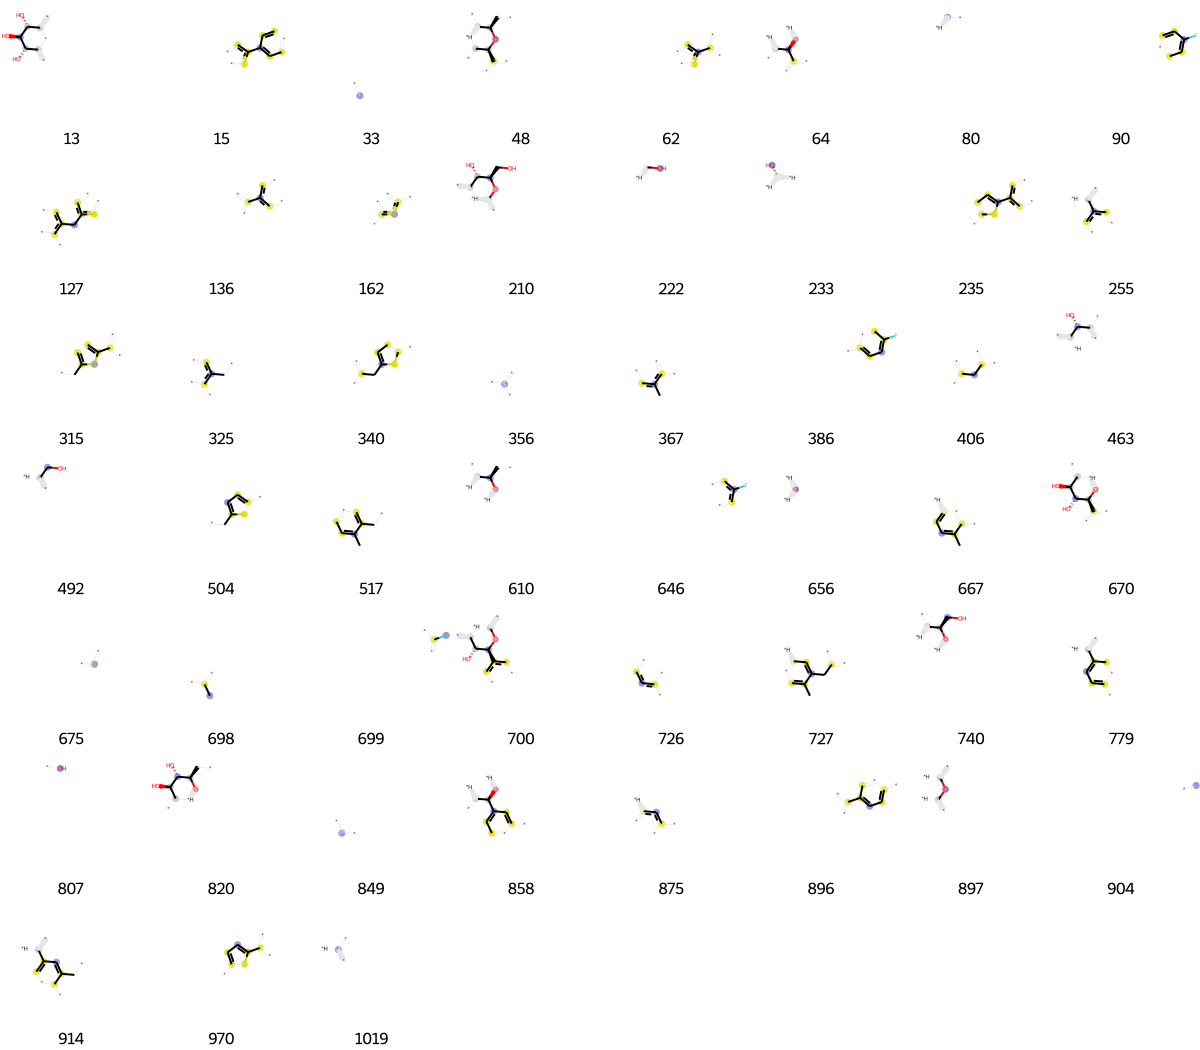

In [120]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [121]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 23,
 61,
 64,
 75,
 128,
 131,
 175,
 187,
 202,
 246,
 315,
 319,
 350,
 356,
 378,
 389,
 428,
 448,
 451,
 452,
 456,
 502,
 512,
 559,
 569,
 578,
 583,
 650,
 651,
 656,
 674,
 715,
 725,
 726,
 807,
 830,
 842,
 849,
 875,
 883,
 893,
 931,
 967,
 993]

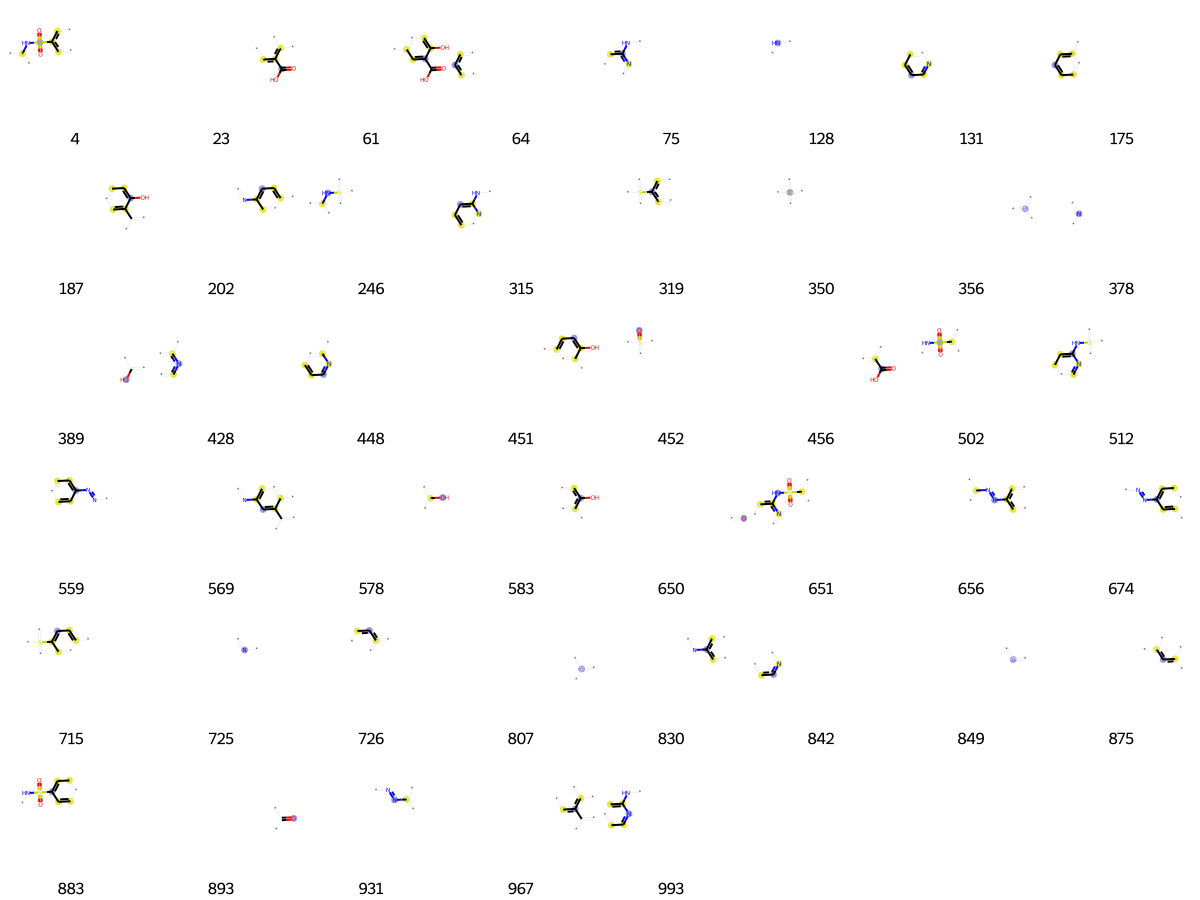

In [122]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [123]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 4,
 29,
 33,
 36,
 39,
 69,
 80,
 108,
 114,
 117,
 128,
 139,
 140,
 147,
 160,
 210,
 242,
 250,
 254,
 271,
 295,
 301,
 354,
 378,
 392,
 483,
 484,
 519,
 531,
 549,
 557,
 603,
 619,
 650,
 658,
 672,
 684,
 689,
 694,
 697,
 736,
 739,
 749,
 776,
 807,
 837,
 847,
 865,
 893,
 926,
 932,
 935,
 954,
 965,
 1009,
 1013,
 1019]

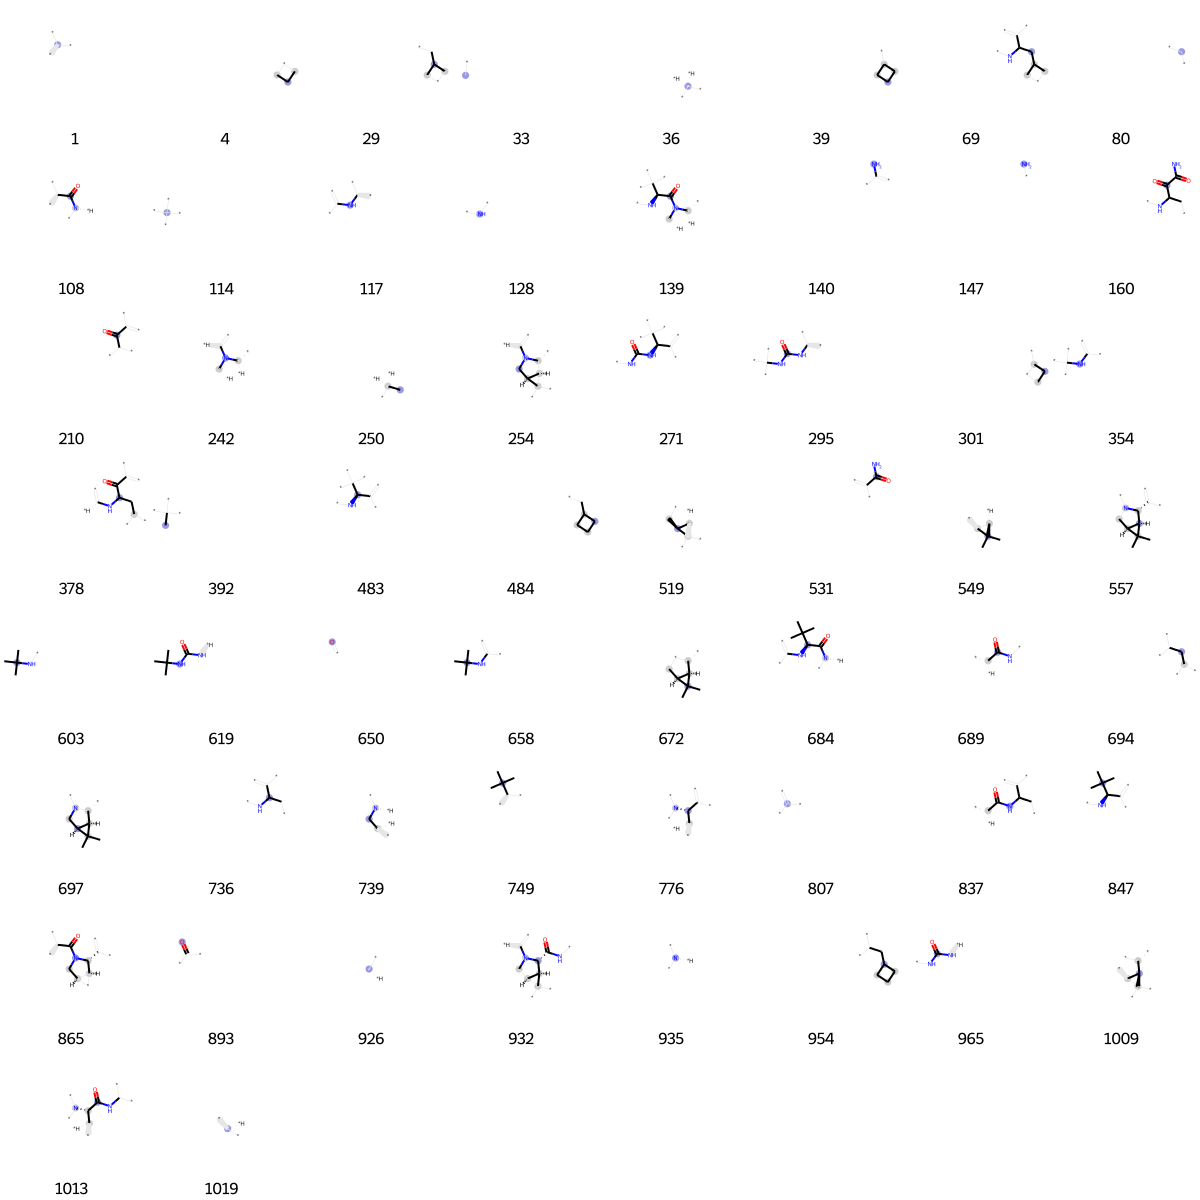

In [124]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [125]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 62,
 147,
 161,
 201,
 228,
 356,
 378,
 433,
 496,
 698,
 707,
 799,
 831,
 849,
 875,
 929,
 990]

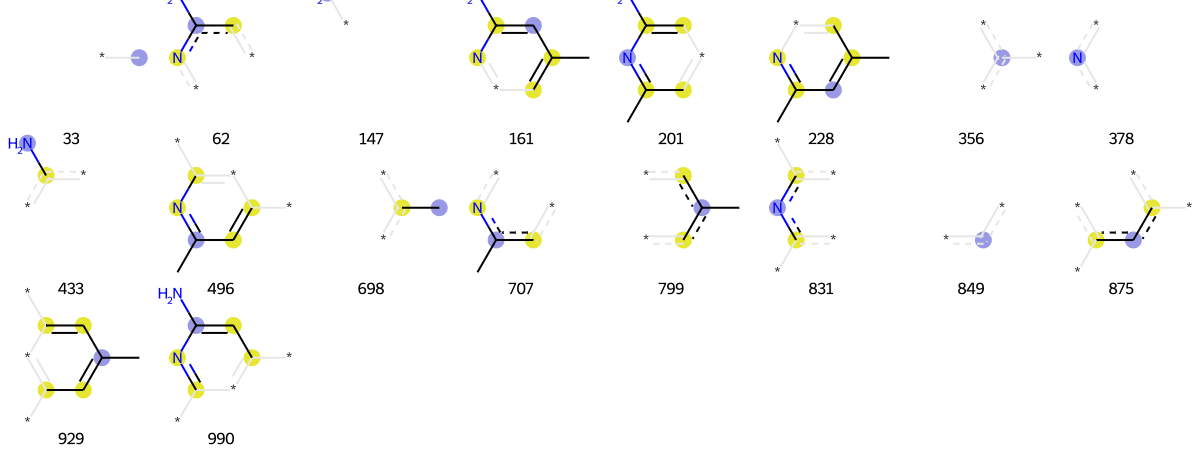

In [126]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [127]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[29,
 56,
 64,
 80,
 128,
 175,
 198,
 216,
 255,
 279,
 304,
 310,
 317,
 319,
 350,
 356,
 361,
 366,
 389,
 452,
 464,
 465,
 486,
 502,
 561,
 602,
 638,
 641,
 650,
 659,
 673,
 699,
 715,
 726,
 730,
 745,
 807,
 816,
 849,
 875,
 893,
 904,
 942,
 961]

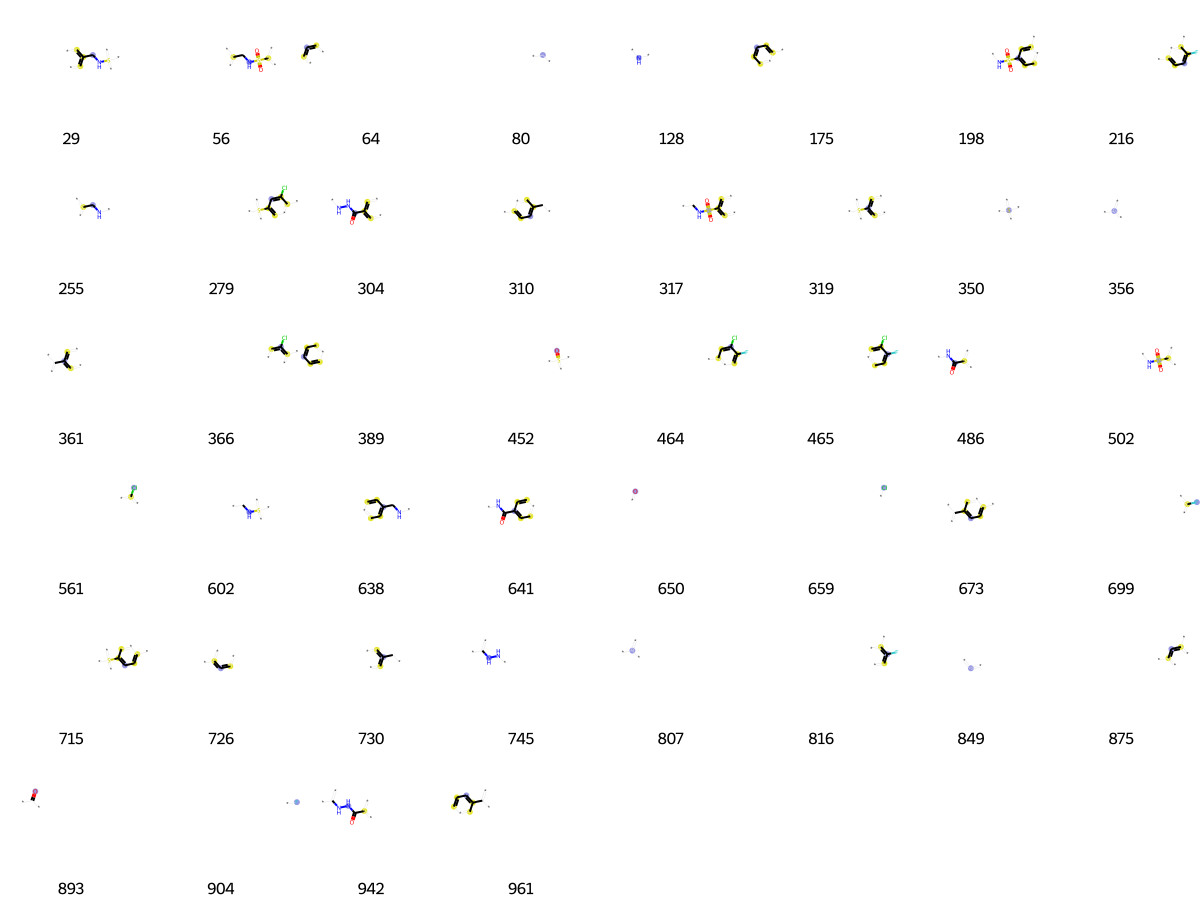

In [128]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [129]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 42,
 51,
 80,
 90,
 121,
 128,
 136,
 153,
 159,
 294,
 314,
 319,
 350,
 356,
 367,
 378,
 430,
 452,
 455,
 456,
 504,
 506,
 525,
 585,
 592,
 626,
 650,
 674,
 687,
 715,
 721,
 726,
 727,
 758,
 794,
 802,
 807,
 820,
 831,
 849,
 885,
 896,
 935]

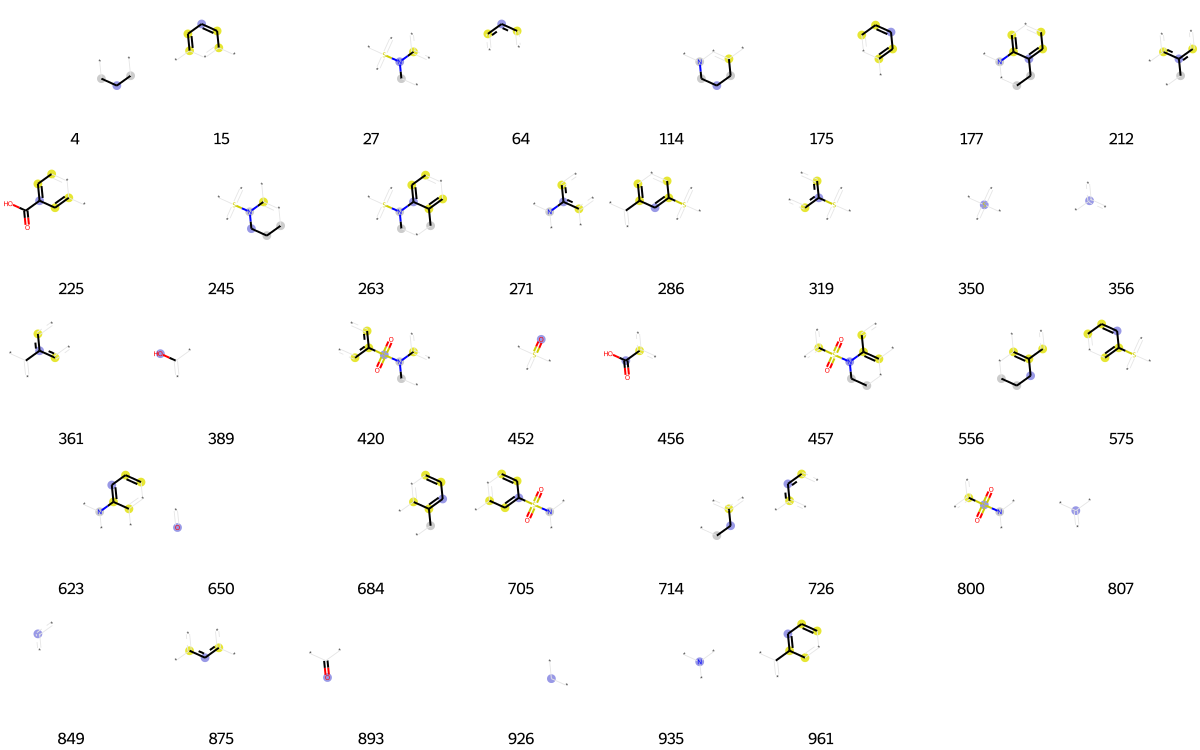

In [130]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [131]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[45,
 63,
 74,
 80,
 121,
 157,
 162,
 165,
 193,
 205,
 216,
 222,
 288,
 289,
 314,
 342,
 356,
 390,
 456,
 458,
 473,
 545,
 561,
 565,
 650,
 659,
 675,
 726,
 760,
 767,
 802,
 807,
 816,
 834,
 849,
 875,
 885,
 893,
 895,
 926,
 935,
 985,
 1008,
 1009,
 1014]

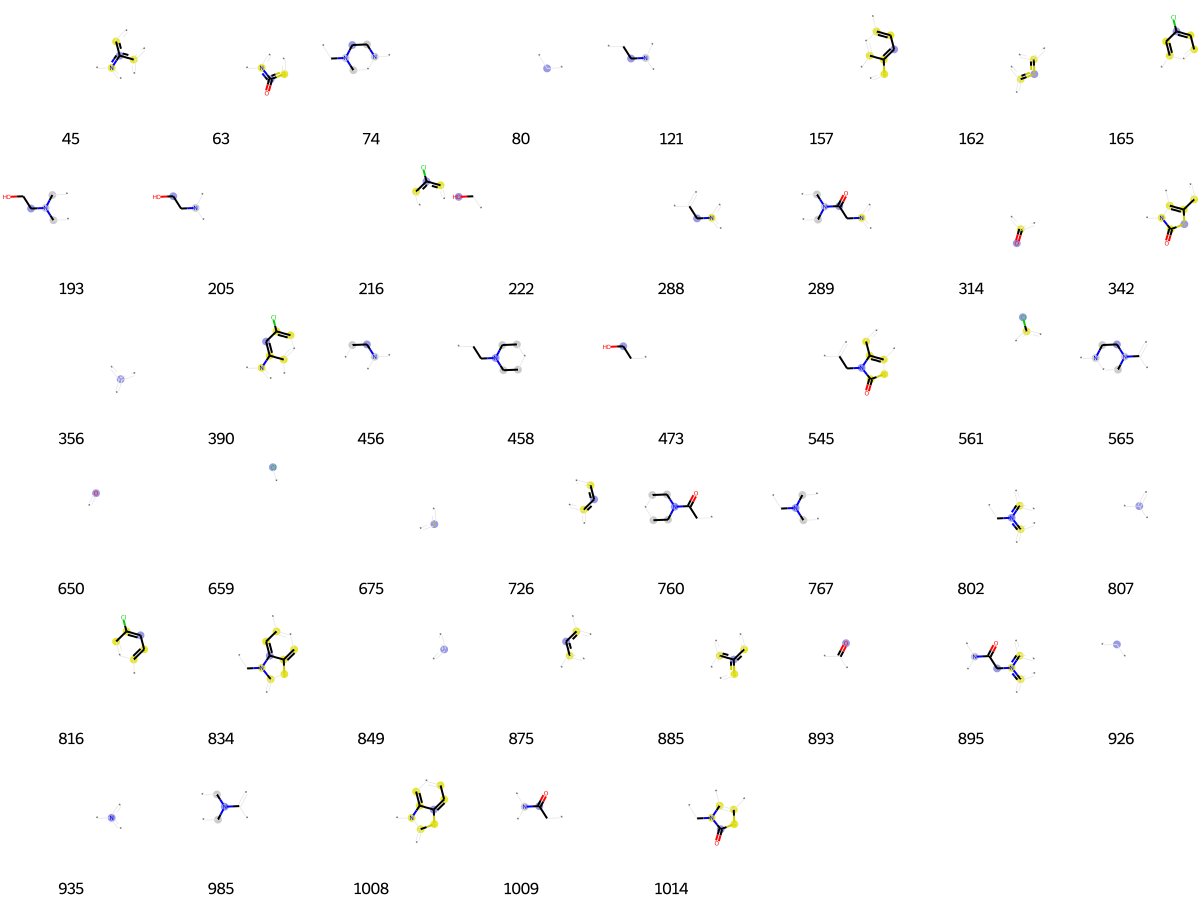

In [132]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [133]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[3,
 33,
 64,
 95,
 128,
 175,
 208,
 254,
 255,
 292,
 301,
 356,
 366,
 371,
 378,
 406,
 500,
 530,
 551,
 561,
 570,
 577,
 654,
 659,
 666,
 726,
 779,
 793,
 849,
 875,
 882,
 926,
 976,
 1019]

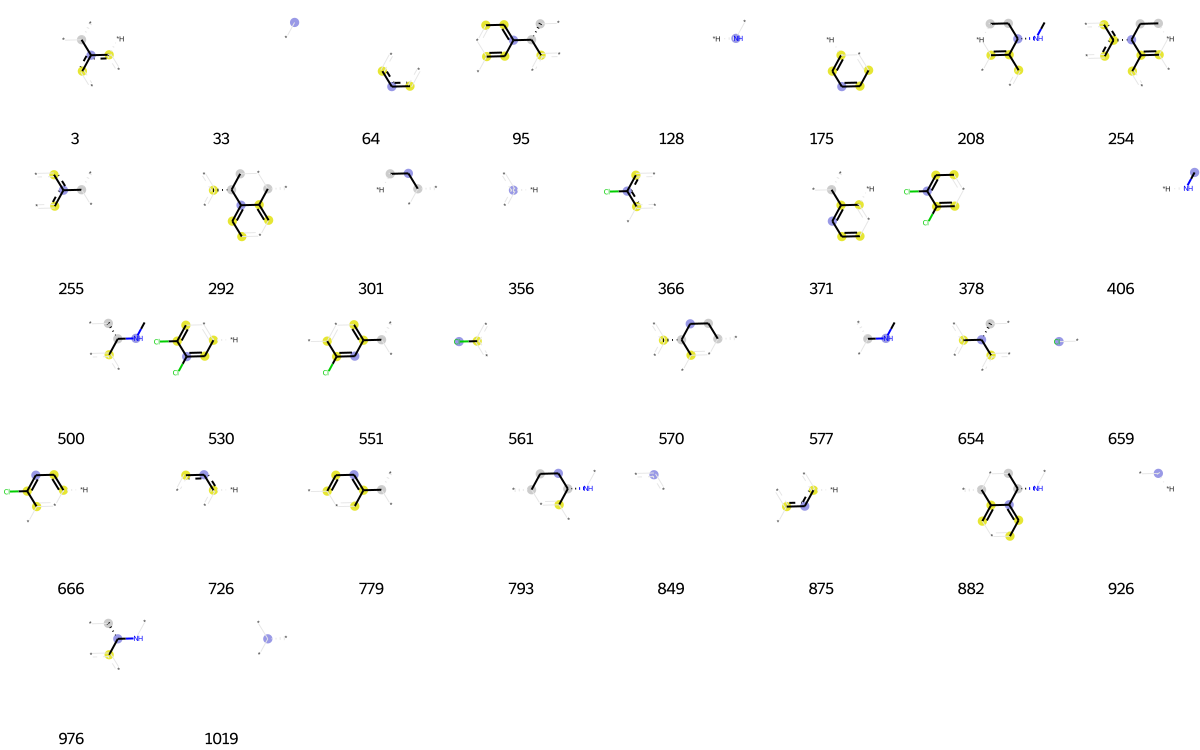

In [134]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [135]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 64,
 128,
 132,
 175,
 193,
 200,
 209,
 240,
 246,
 260,
 314,
 322,
 333,
 350,
 356,
 360,
 384,
 389,
 409,
 452,
 465,
 525,
 562,
 593,
 624,
 633,
 650,
 656,
 667,
 692,
 694,
 695,
 726,
 764,
 784,
 849,
 875,
 934,
 946,
 947,
 951,
 989,
 1002,
 1004,
 1017]

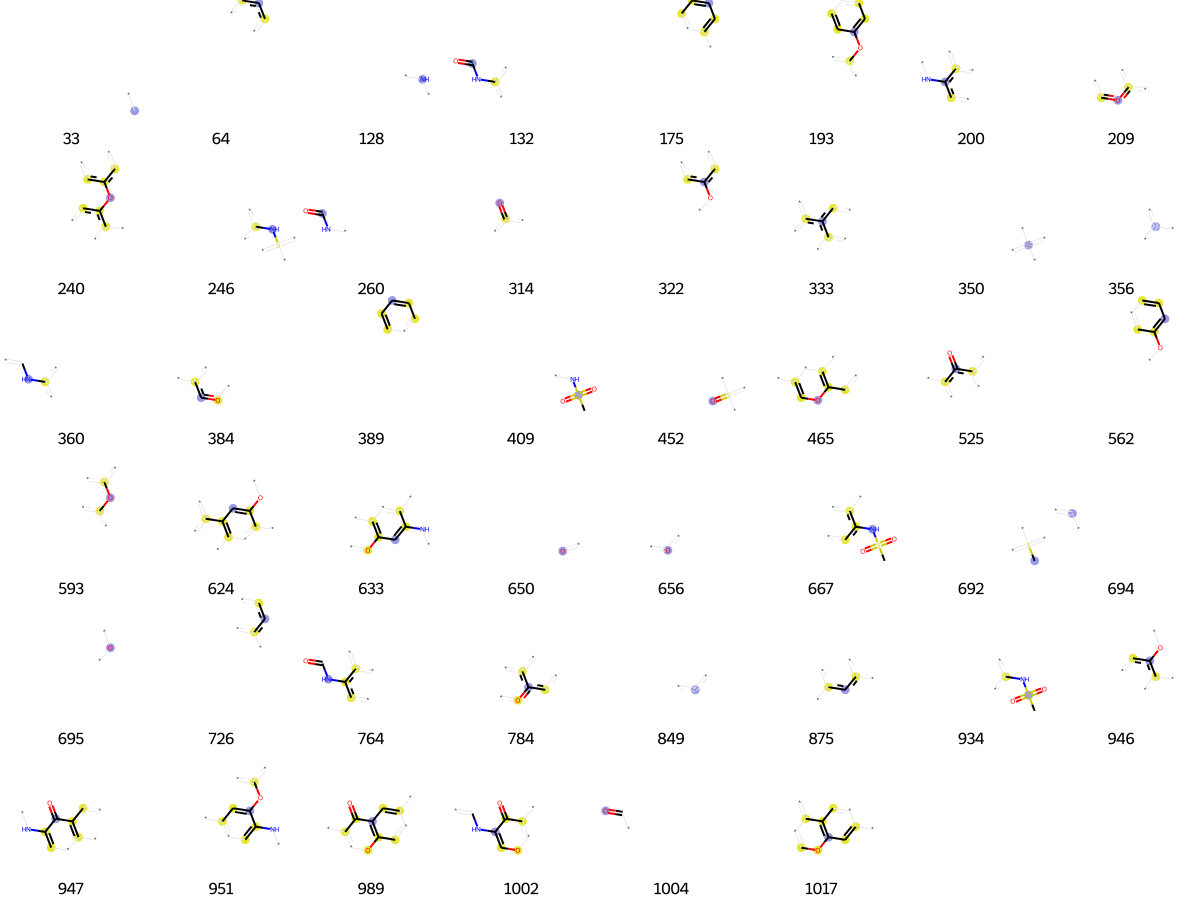

In [136]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [137]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 34,
 41,
 53,
 80,
 90,
 102,
 112,
 121,
 128,
 136,
 153,
 167,
 191,
 192,
 294,
 305,
 314,
 322,
 356,
 360,
 378,
 428,
 430,
 455,
 504,
 506,
 585,
 650,
 672,
 674,
 690,
 695,
 718,
 721,
 726,
 727,
 771,
 772,
 790,
 792,
 794,
 802,
 807,
 820,
 831,
 843,
 849,
 863,
 890,
 893,
 896,
 901,
 917,
 930,
 935,
 980]

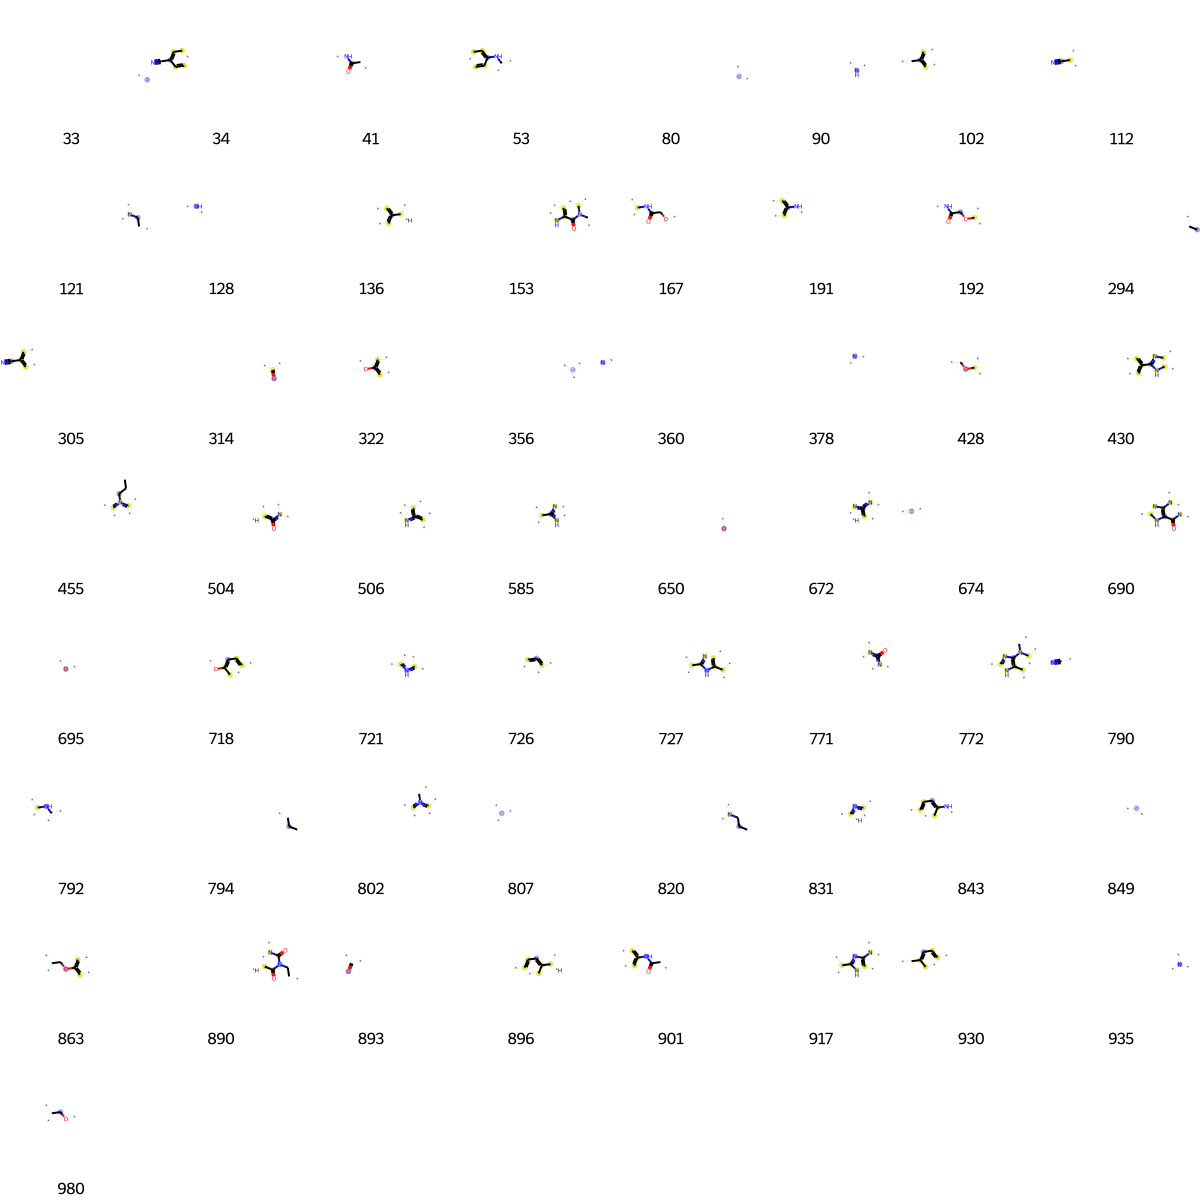

In [138]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [139]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 33,
 101,
 113,
 121,
 140,
 147,
 237,
 252,
 283,
 350,
 351,
 356,
 361,
 392,
 403,
 452,
 453,
 598,
 603,
 645,
 650,
 673,
 688,
 692,
 725,
 726,
 742,
 805,
 807,
 830,
 849,
 875,
 893,
 1011]

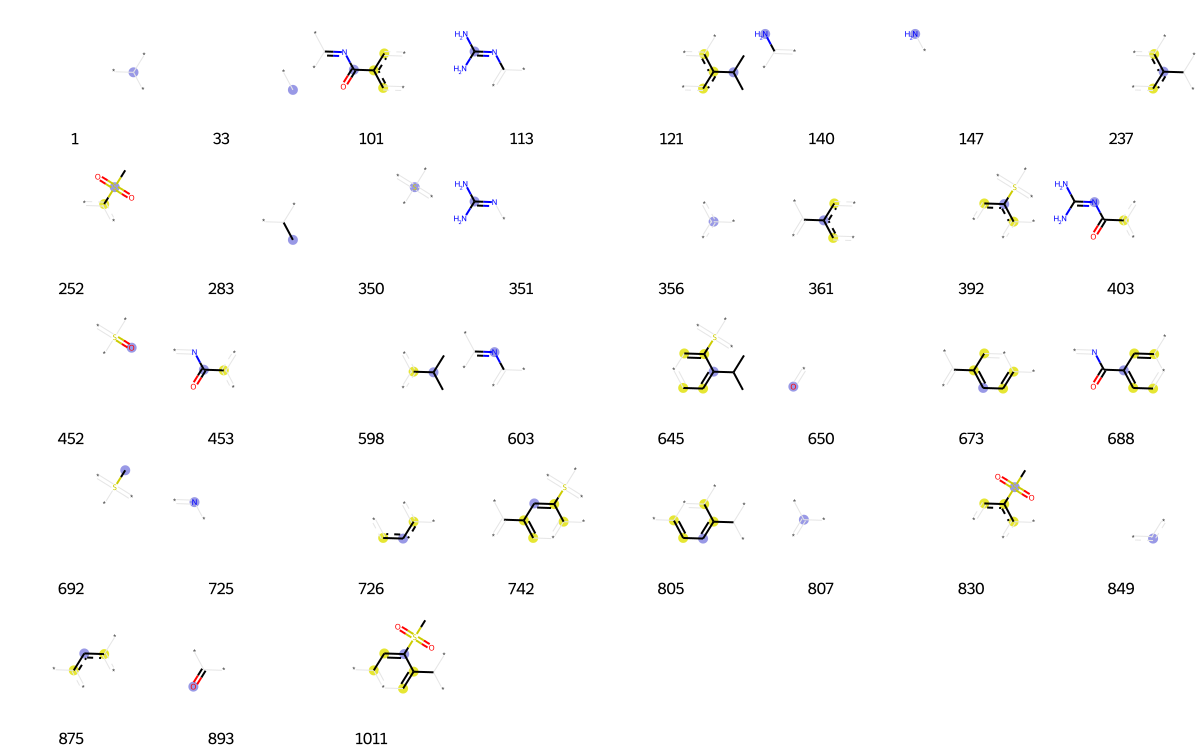

In [140]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [141]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[6,
 66,
 123,
 134,
 212,
 231,
 255,
 289,
 356,
 381,
 441,
 513,
 578,
 656,
 726,
 745,
 754,
 779,
 783,
 790,
 807,
 825,
 849,
 875,
 881,
 899,
 926,
 956,
 976,
 1019]

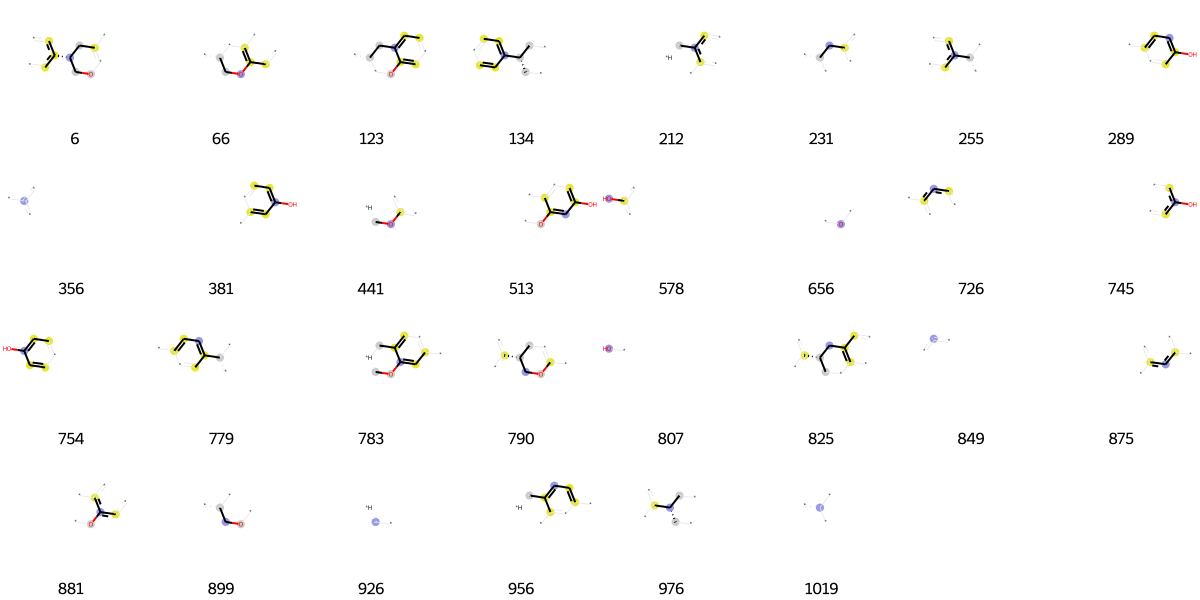

In [142]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [143]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[23,
 64,
 145,
 175,
 187,
 310,
 356,
 386,
 389,
 423,
 439,
 456,
 578,
 583,
 592,
 632,
 650,
 695,
 705,
 726,
 807,
 849,
 893,
 909,
 946,
 967]

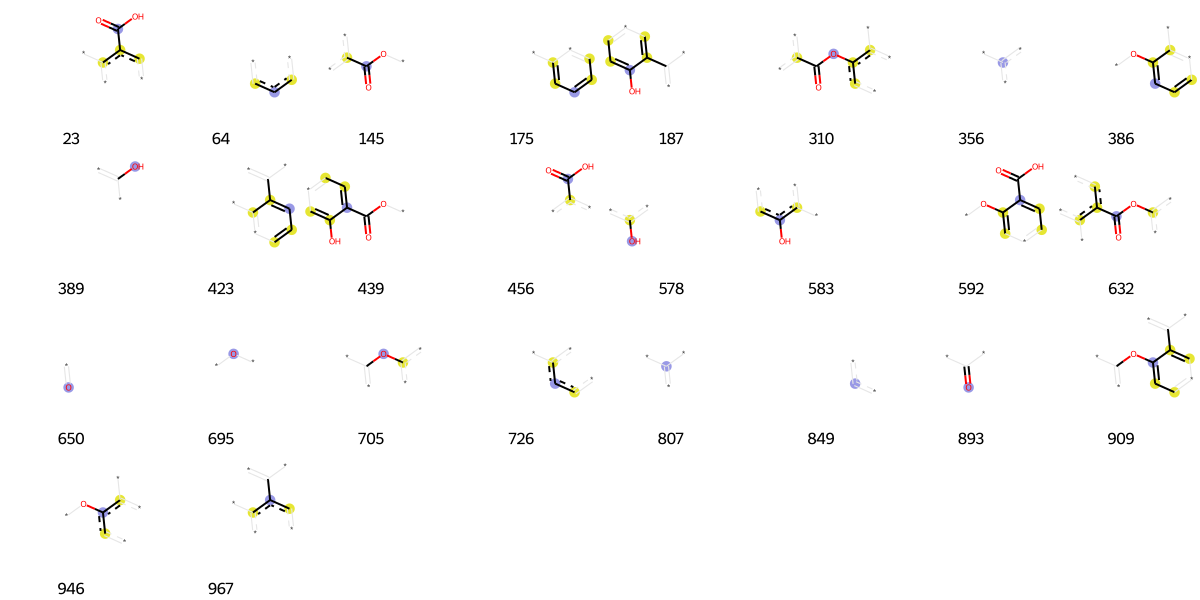

In [144]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [145]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 63,
 74,
 80,
 105,
 121,
 128,
 138,
 152,
 154,
 157,
 249,
 314,
 342,
 352,
 356,
 366,
 378,
 406,
 428,
 456,
 458,
 474,
 504,
 511,
 512,
 540,
 544,
 558,
 561,
 565,
 581,
 596,
 621,
 622,
 637,
 650,
 653,
 659,
 672,
 694,
 695,
 723,
 767,
 770,
 802,
 804,
 807,
 831,
 841,
 849,
 875,
 887,
 888,
 893,
 910,
 926,
 935,
 946,
 959,
 985,
 997,
 1003,
 1011]

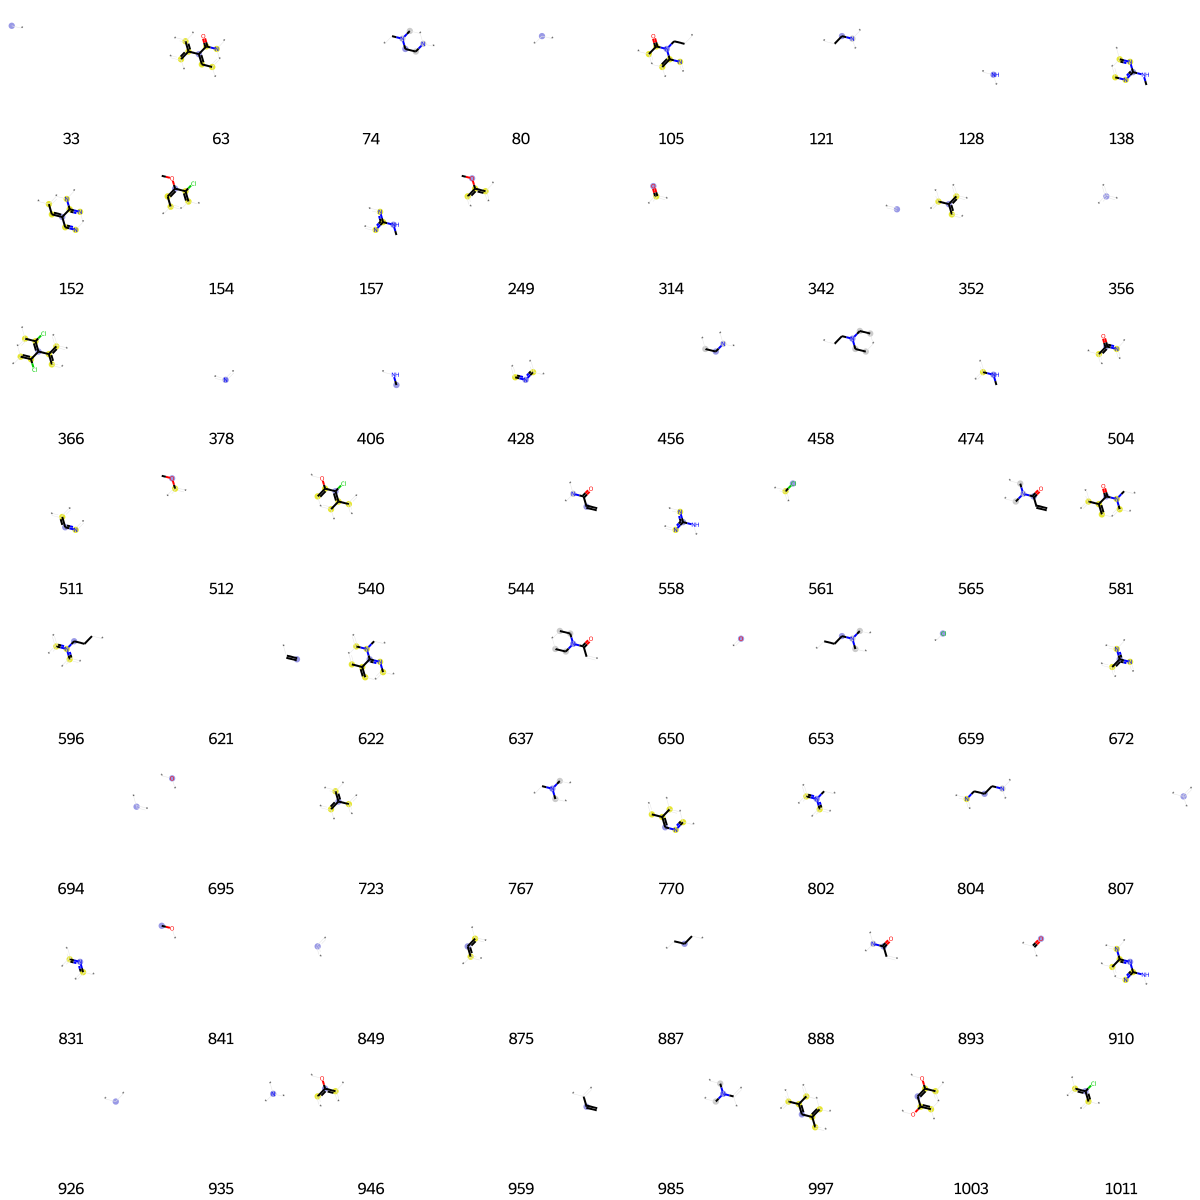

In [146]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [147]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[21,
 64,
 80,
 102,
 107,
 121,
 175,
 219,
 310,
 322,
 356,
 381,
 389,
 417,
 428,
 430,
 456,
 458,
 523,
 562,
 653,
 654,
 656,
 695,
 726,
 730,
 745,
 767,
 825,
 849,
 887,
 926,
 935,
 950,
 978,
 1018]

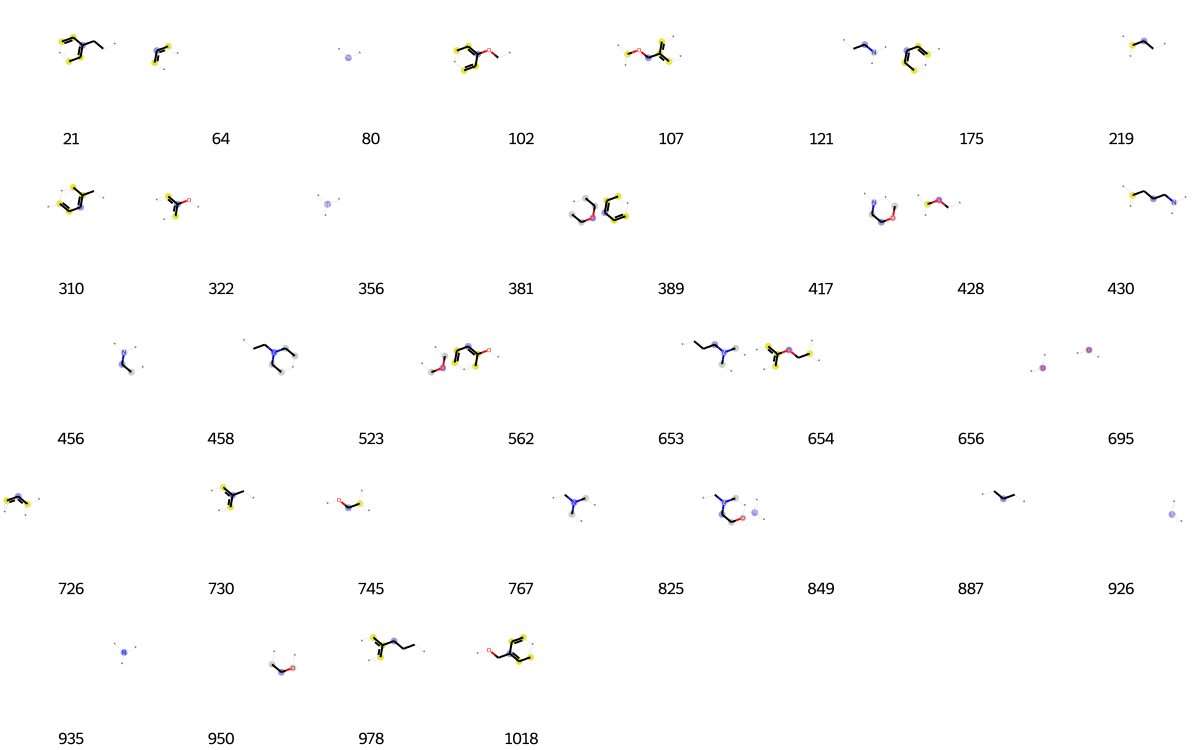

In [148]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [149]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[5,
 8,
 15,
 18,
 23,
 33,
 64,
 67,
 128,
 135,
 163,
 165,
 173,
 191,
 212,
 216,
 230,
 249,
 323,
 329,
 345,
 352,
 356,
 378,
 386,
 389,
 428,
 456,
 458,
 486,
 491,
 495,
 499,
 511,
 512,
 539,
 544,
 558,
 561,
 562,
 592,
 624,
 650,
 659,
 680,
 684,
 695,
 698,
 699,
 723,
 724,
 726,
 758,
 807,
 816,
 831,
 841,
 843,
 849,
 875,
 881,
 893,
 904,
 926,
 946,
 967]

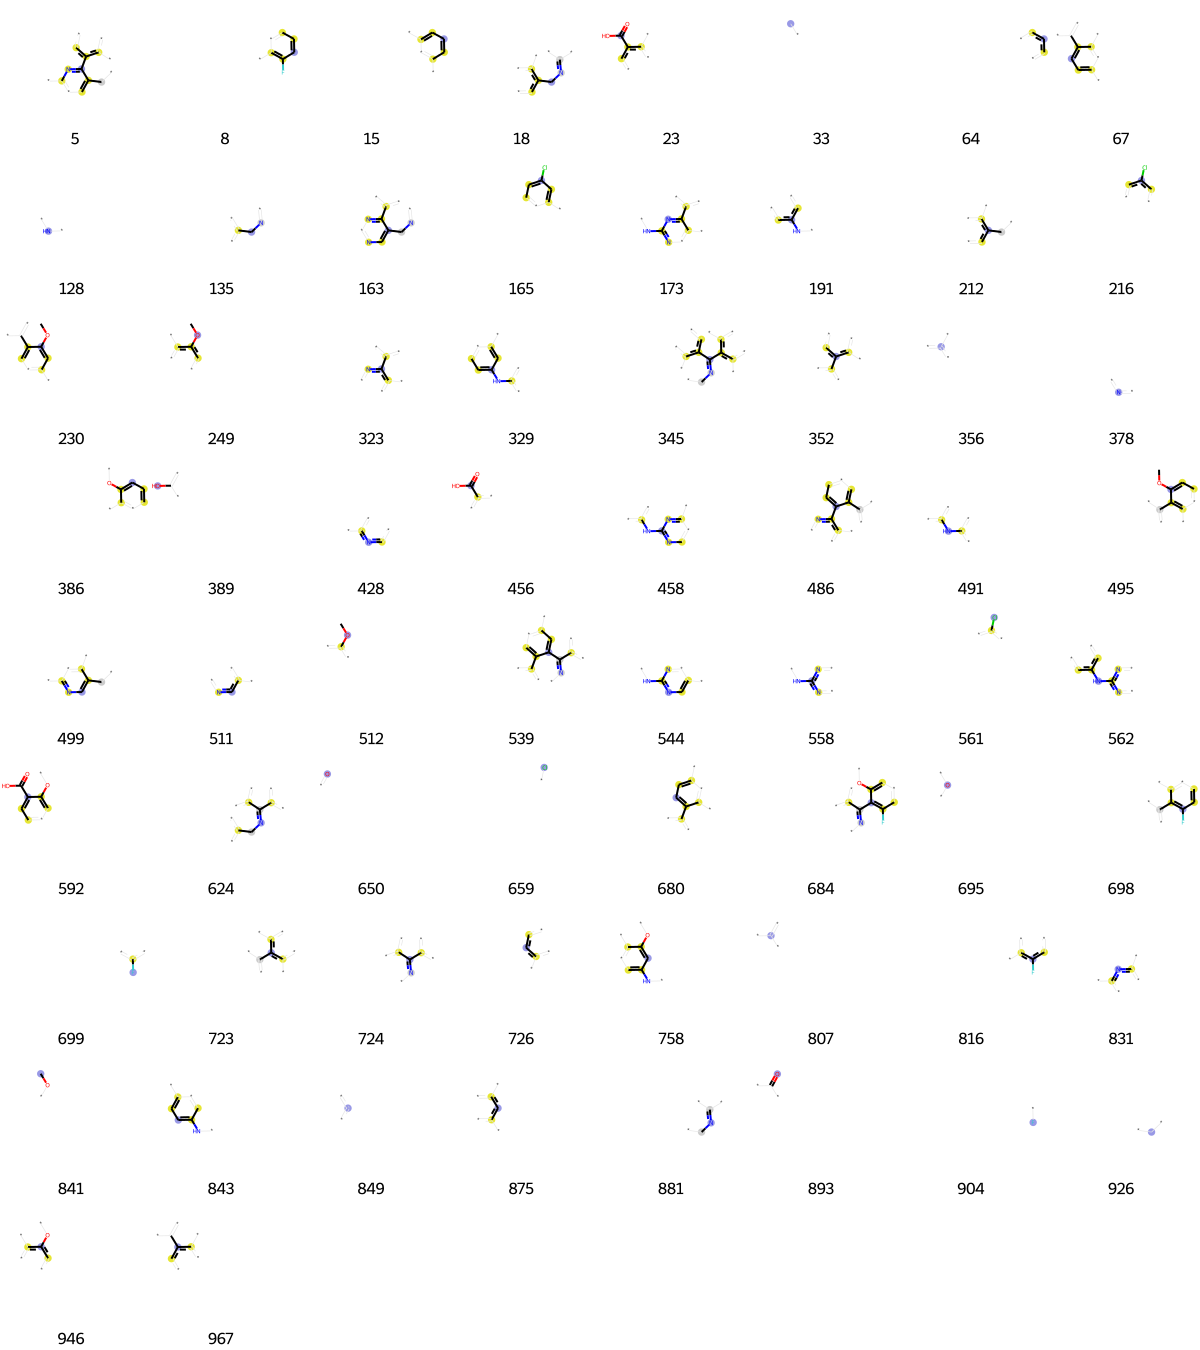

In [150]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [151]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[11,
 27,
 33,
 36,
 57,
 84,
 127,
 129,
 138,
 182,
 184,
 221,
 242,
 250,
 253,
 292,
 301,
 314,
 345,
 356,
 408,
 412,
 436,
 455,
 507,
 519,
 529,
 555,
 559,
 622,
 650,
 674,
 695,
 711,
 714,
 717,
 757,
 807,
 841,
 849,
 893,
 909,
 915,
 926,
 947,
 958,
 974,
 996,
 1017,
 1019]

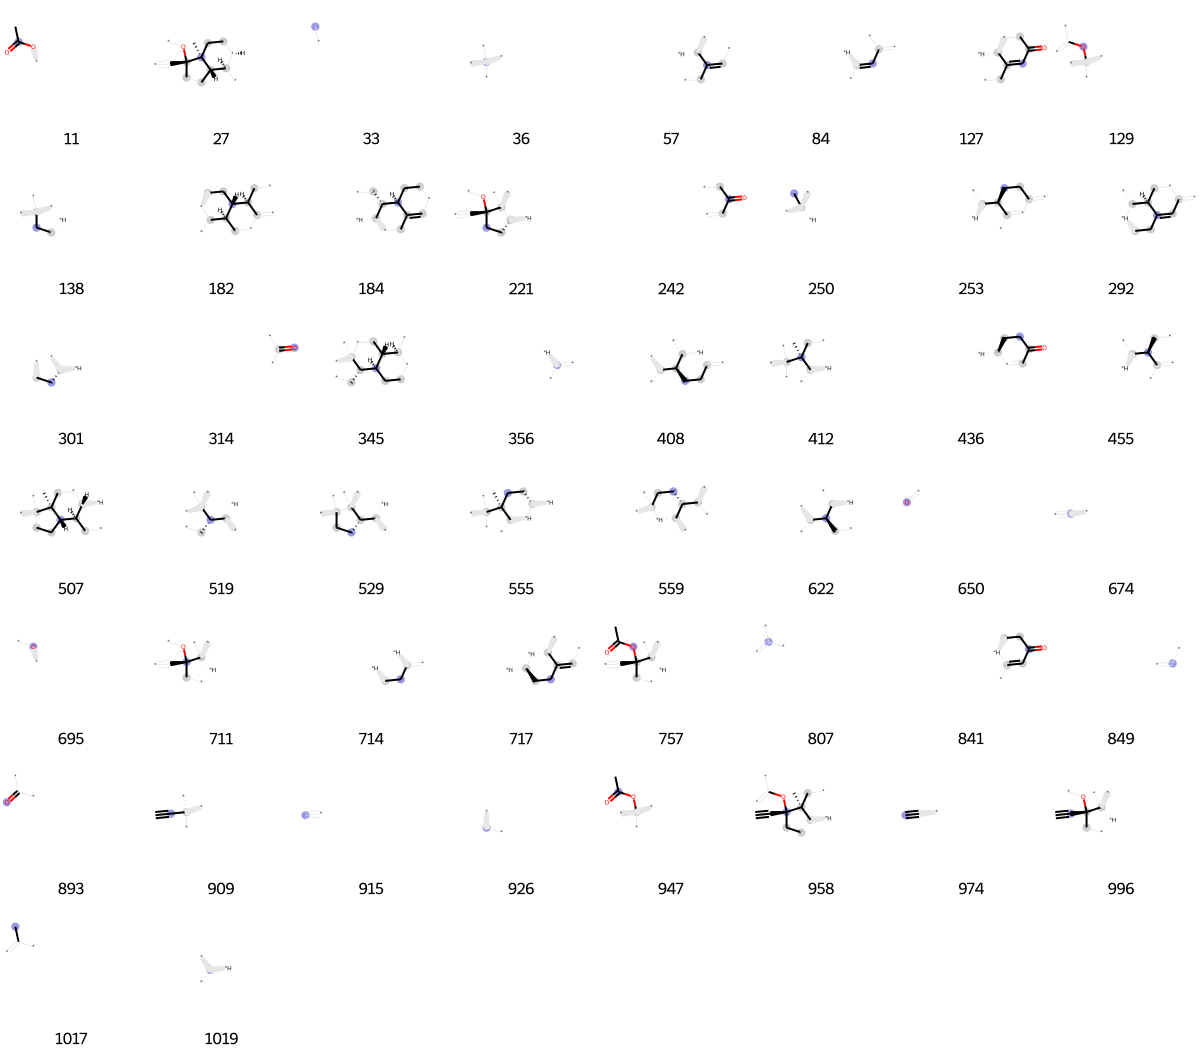

In [152]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])